📘 Análisis Exploratorio: Vigilancia epidemiologica de Infecciones Respiratoiras Agudas (IRA)

Grupo 4 – Samsung Innovation Campus 2025

Docentes: Pedro Benites / Luis Chio

Integrantes:

- Luiz Ignacio Quineche Casana

- Jessica Amapola Serpa Buitrón

- Oscar Romero Mayta

- Wisner Ernan Valdiviezo Goicochea

- Angeli Flores Quito

# 1. Limpieza de datos

## Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/01_data_cruda/vigilancia_iras_2000_2023.csv')


## Identificación de valores nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143985 entries, 0 to 2143984
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   departamento          object
 1   provincia             object
 2   distrito              object
 3   ano                   int64 
 4   semana                int64 
 5   sub_reg_nt            int64 
 6   ubigeo                int64 
 7   ira_no_neumonia       int64 
 8   neumonias_men5        int64 
 9   neumonias_60mas       int64 
 10  hospitalizados_men5   int64 
 11  hospitalizados_60mas  int64 
 12  defunciones_men5      int64 
 13  defunciones_60mas     int64 
dtypes: int64(11), object(3)
memory usage: 229.0+ MB


In [4]:
# Number of nulls per column
null_counts = df.isnull().sum()

# Percentage of nulls per column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a single DataFrame to see it neatly
null_summary = pd.DataFrame({
    'null_count': null_counts,
    'null_percentage': null_percentage
})

null_summary


,null_count,null_percentage
departamento,0,0.0
provincia,0,0.0
distrito,0,0.0
ano,0,0.0
semana,0,0.0
sub_reg_nt,0,0.0
ubigeo,0,0.0
ira_no_neumonia,0,0.0
neumonias_men5,0,0.0
neumonias_60mas,0,0.0


Vemos que no hay valores nulos

## Duplicados

In [5]:
# Contar cuántos registros duplicados hay en el DataFrame
num_duplicados = df.duplicated().sum()
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

# Opcional: mostrar los registros duplicados (si los hay)
df[df.duplicated()]

Número de registros duplicados en el dataset: 0


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas


Vemos que no existen registros duplicados

## Conversión de tipos de datos, tratamiento de variables categóricas o numéricas.

Veamos nuevamente que tipos de datos tenemos por defecto en nuestro dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143985 entries, 0 to 2143984
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   departamento          object
 1   provincia             object
 2   distrito              object
 3   ano                   int64 
 4   semana                int64 
 5   sub_reg_nt            int64 
 6   ubigeo                int64 
 7   ira_no_neumonia       int64 
 8   neumonias_men5        int64 
 9   neumonias_60mas       int64 
 10  hospitalizados_men5   int64 
 11  hospitalizados_60mas  int64 
 12  defunciones_men5      int64 
 13  defunciones_60mas     int64 
dtypes: int64(11), object(3)
memory usage: 229.0+ MB


Ahora veamos algunos registros para tomar la desición de si mantenemos el tipo de dato o lo cambiamos

In [7]:
df.head()

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,1,9,10101,6,0,0,0,0,0,0
1,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,1,36,10101,10,0,0,0,0,0,0
2,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,2,9,10101,6,0,0,0,0,0,0
3,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,2,36,10101,7,3,0,0,0,0,0
4,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,3,36,10101,8,2,0,0,0,0,0


**Revisión de tipos de datos**

- Es correcto que **'departamento'**, **'provincia'** y **'distrito'** sean de tipo `object`, ya que son datos categóricos.
- También es correcto que **'ano'** sea un valor numérico (`int`).
- Vamos a convertir:
  - **'semana'** a `int64`.
  - **'sub_reg_nt'** también a `int`.
  - **'ubigeo'** a `object`, ya que solo funciona como identificador y no planeamos hacer cálculos matemáticos con él.

**Tratamiento de variables numéricas**

- Convertiremos a `int64` las siguientes columnas que representan cantidades:
  - **'ira_no_neumonia'**
  - **'neumonias_men5'**
  - **'neumonias_60mas'**
  - **'hospitalizados_men5'**
  - **'hospitalizados_60mas'**
  - **'defunciones_men5'**
  - **'defunciones_60mas'**


In [8]:
# Convertir 'semana' y 'sub_reg_nt' a int64
df['semana'] = df['semana'].astype('int64')
df['sub_reg_nt'] = df['sub_reg_nt'].astype('int64')

# Convertir 'ubigeo' a object (string)
df['ubigeo'] = df['ubigeo'].astype('object')

# Convertir las columnas de conteo a int64
cols_a_convertir = [
    'ira_no_neumonia',
    'neumonias_men5',
    'neumonias_60mas',
    'hospitalizados_men5',
    'hospitalizados_60mas',
    'defunciones_men5',
    'defunciones_60mas'
]

df[cols_a_convertir] = df[cols_a_convertir].astype('int64')

Verificamos que los datos sean los esperados

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143985 entries, 0 to 2143984
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   departamento          object
 1   provincia             object
 2   distrito              object
 3   ano                   int64 
 4   semana                int64 
 5   sub_reg_nt            int64 
 6   ubigeo                object
 7   ira_no_neumonia       int64 
 8   neumonias_men5        int64 
 9   neumonias_60mas       int64 
 10  hospitalizados_men5   int64 
 11  hospitalizados_60mas  int64 
 12  defunciones_men5      int64 
 13  defunciones_60mas     int64 
dtypes: int64(10), object(4)
memory usage: 229.0+ MB


## Evaluación básica de calidad del dataset

- Se revisó la existencia de valores nulos en los registros, pero no se encontró ninguno.
- Se revisó la existencia de registros duplicados, pero no se encontró ninguno.
- Se revisó y ajustó los tipos de datos para que reflejen la naturaleza real de cada columna.

**Conclusión:**  
Tras estas revisiones, el dataset es en general confiable y consistente para el análisis, aunque se debe considerar que inicialmente presentaba un registro incompleto que fue depurado.

In [10]:
df.head()

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,1,9,10101,6,0,0,0,0,0,0
1,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,1,36,10101,10,0,0,0,0,0,0
2,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,2,9,10101,6,0,0,0,0,0,0
3,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,2,36,10101,7,3,0,0,0,0,0
4,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,3,36,10101,8,2,0,0,0,0,0


En el análisis exploratorio univariado se utilizaron tanto los datos con outliers como sin ellos para visualizar su presencia y comprender su impacto en la variable objetivo. Sin embargo, los análisis bivariados y multivariados se realizaron únicamente con los datos sin outliers, con el fin de evitar distorsiones y preparar una base confiable para el futuro desarrollo de modelos predictivos.

# 2. EDA

## Análisis Univariado



Veamos a continuación nuevamente con qué columnas contamos.

In [11]:
df.columns

Index(['departamento', 'provincia', 'distrito', 'ano', 'semana', 'sub_reg_nt',
       'ubigeo', 'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
       'hospitalizados_men5', 'hospitalizados_60mas', 'defunciones_men5',
       'defunciones_60mas'],
      dtype='object')

In [12]:
cols_eda = [
    'ira_no_neumonia', 'neumonias_men5', 'neumonias_60mas',
    'hospitalizados_men5', 'hospitalizados_60mas',
    'defunciones_men5', 'defunciones_60mas'
]
df[cols_eda].describe()


,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
count,2.143985e+06,2.143985e+06,2.143985e+06,2.143985e+06,2.143985e+06,2.143985e+06,2.143985e+06
mean,3.069448e+01,4.074609e-01,1.231510e-01,1.263805e-01,4.980958e-02,4.561599e-03,1.087041e-02
std,8.098877e+01,1.701673e+00,1.009836e+00,1.045580e+00,5.968049e-01,7.607280e-02,2.943482e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.753000e+03,1.550000e+02,1.860000e+02,1.113000e+03,1.860000e+02,2.400000e+01,1.800000e+02


### Análisis Univariado para departamento

In [13]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['departamento'].value_counts(),
    'Porcentaje': (df['departamento'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'departamento':")
tabla_univariado


Análisis univariado de la columna 'departamento':


,Frecuencia,Porcentaje
departamento,,
LIMA,252178,11.76
ANCASH,166756,7.78
CAJAMARCA,146234,6.82
JUNIN,137304,6.40
CUSCO,131085,6.11
AREQUIPA,125086,5.83
PUNO,115156,5.37
HUANCAVELICA,114313,5.33
AYACUCHO,113268,5.28


Se observa que el departamento con mayor número de registros es Lima. Esto puede deberse a su mayor densidad poblacional o a que se recopilan más datos en esta zona. Sin embargo, los departamentos con menor cantidad de registros podrían tener una población más reducida o una menor cobertura de datos.

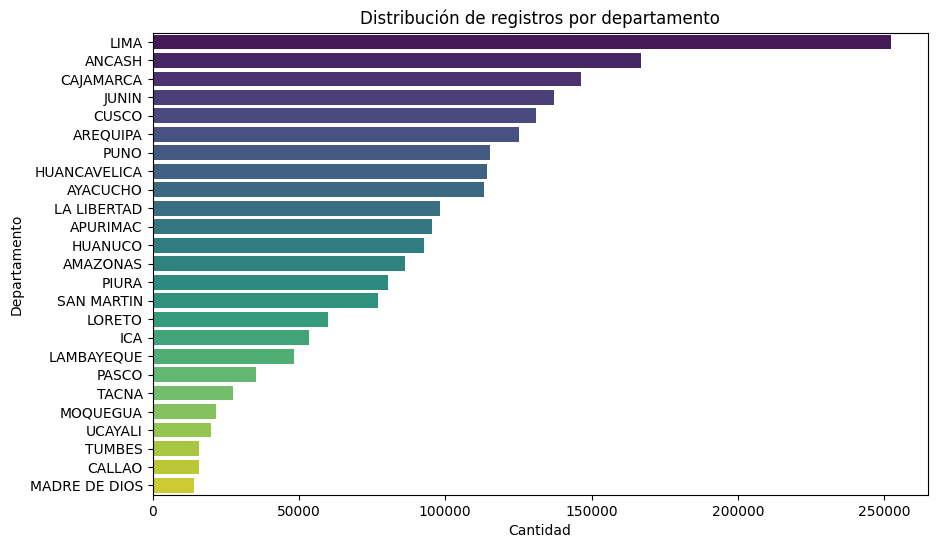

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la frecuencia de cada departamento
freq_df = df['departamento'].value_counts().reset_index()
freq_df.columns = ['departamento', 'Frecuencia']

# Ordenar si deseas mostrar de mayor a menor
freq_df = freq_df.sort_values('Frecuencia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=freq_df,
    y='departamento',
    x='Frecuencia',
    hue='departamento',    # se añade hue
    palette='viridis',
    legend=False          # no mostramos la leyenda
)
plt.title('Distribución de registros por departamento')
plt.xlabel('Cantidad')
plt.ylabel('Departamento')
plt.show()


### Análisis Univariado para provincia

**PREGUNTA: Deberíamos usar solo Lima???**

In [15]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['provincia'].value_counts(),
    'Porcentaje': (df['provincia'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'provincia':")
tabla_univariado


Análisis univariado de la columna 'provincia':


,Frecuencia,Porcentaje
provincia,,
LIMA,125541,5.86
AREQUIPA,35726,1.67
JAUJA,35228,1.64
HUAROCHIRI,32545,1.52
HUANCAYO,30757,1.43
...,...,...
CONTRALMIRANTE VILLAR,3145,0.15
PUTUMAYO,2269,0.11
ASUNCION,2212,0.10


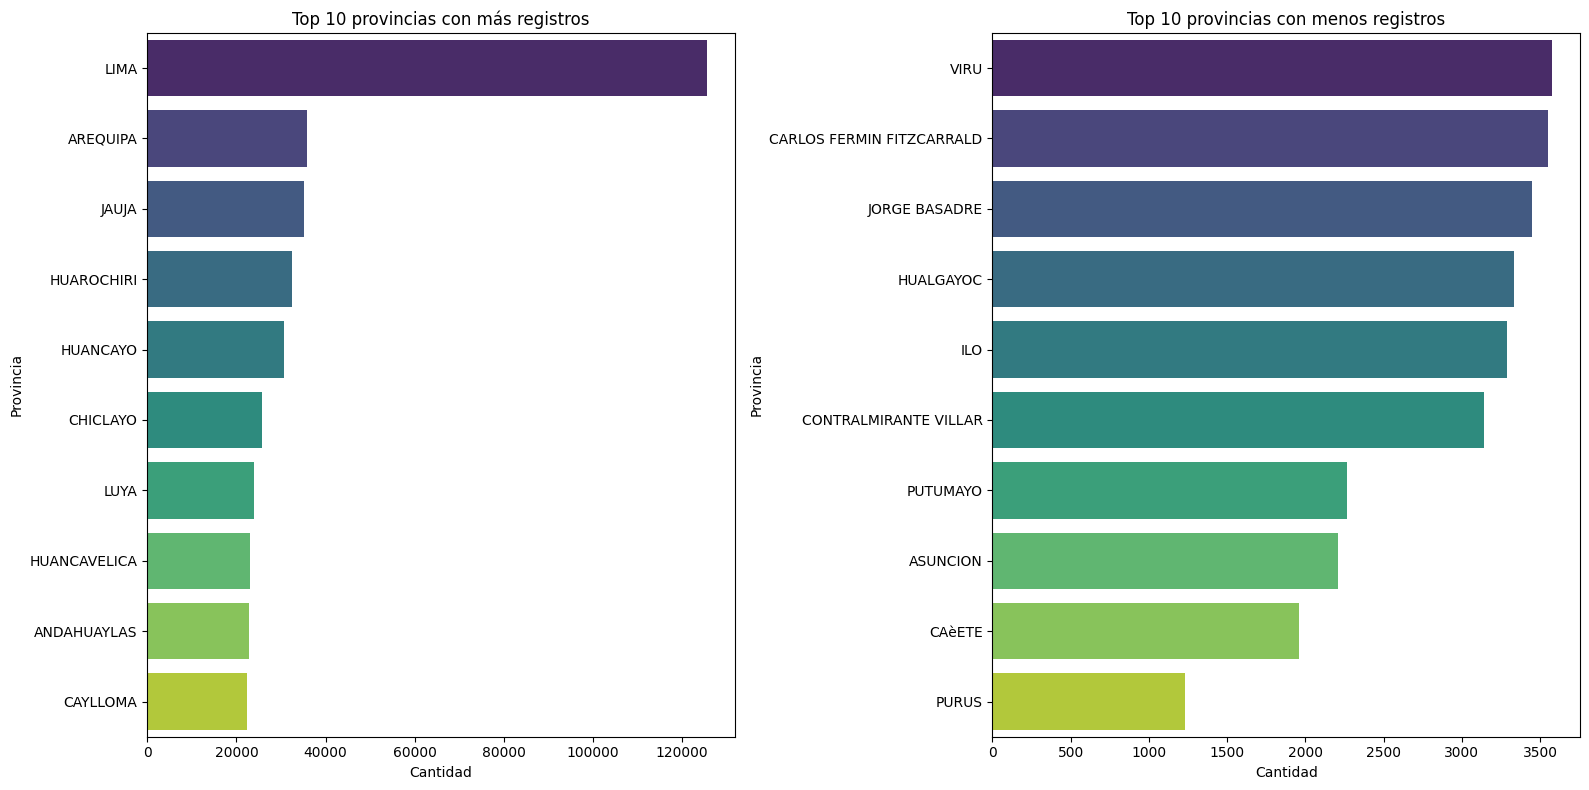

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular frecuencias por provincia
frecuencias = df['provincia'].value_counts()

# Top 10 provincias con más registros
top_10_altas = frecuencias.head(10)

# Top 10 provincias con menos registros
top_10_bajas = frecuencias.tail(10)

# Crear DataFrames auxiliares
df_top_altas = pd.DataFrame({
    'Provincia': top_10_altas.index,
    'Frecuencia': top_10_altas.values
})

df_top_bajas = pd.DataFrame({
    'Provincia': top_10_bajas.index,
    'Frecuencia': top_10_bajas.values
})

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico top 10 altas
sns.barplot(
    data=df_top_altas,
    y='Provincia',
    x='Frecuencia',
    hue='Provincia',
    palette='viridis',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 provincias con más registros')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Provincia')

# Gráfico top 10 bajas
sns.barplot(
    data=df_top_bajas,
    y='Provincia',
    x='Frecuencia',
    hue='Provincia',
    palette='viridis',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 10 provincias con menos registros')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Provincia')

plt.tight_layout()
plt.show()


Las provincias con más registros, como Lima, reflejan una alta densidad poblacional y mejor infraestructura de salud y recopilación de datos. En contraste, provincias con menos registros, como Purús, Cabete, Asunción y Putumayo, probablemente tienen poblaciones más reducidas y podrían sufrir de subrepresentación o menor cobertura de datos, especialmente en áreas remotas. Esta disparidad resalta la importancia de considerar el contexto demográfico y la calidad de la recolección de información al interpretar los resultados a nivel provincial.

### Análisis Univariado para distrito

In [17]:
# Crear tabla combinada de conteo y porcentaje
tabla_univariado = pd.DataFrame({
    'Frecuencia': df['distrito'].value_counts(),
    'Porcentaje': (df['distrito'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'distrito':")
tabla_univariado


Análisis univariado de la columna 'distrito':


,Frecuencia,Porcentaje
distrito,,
SANTA ROSA,11235,0.52
LIMA,7418,0.35
INDEPENDENCIA,6581,0.31
BELLAVISTA,6140,0.29
SAN LUIS,5733,0.27
...,...,...
CIELO PUNCO,67,0.00
UNION PROGRESO,52,0.00
PATIBAMBA,23,0.00


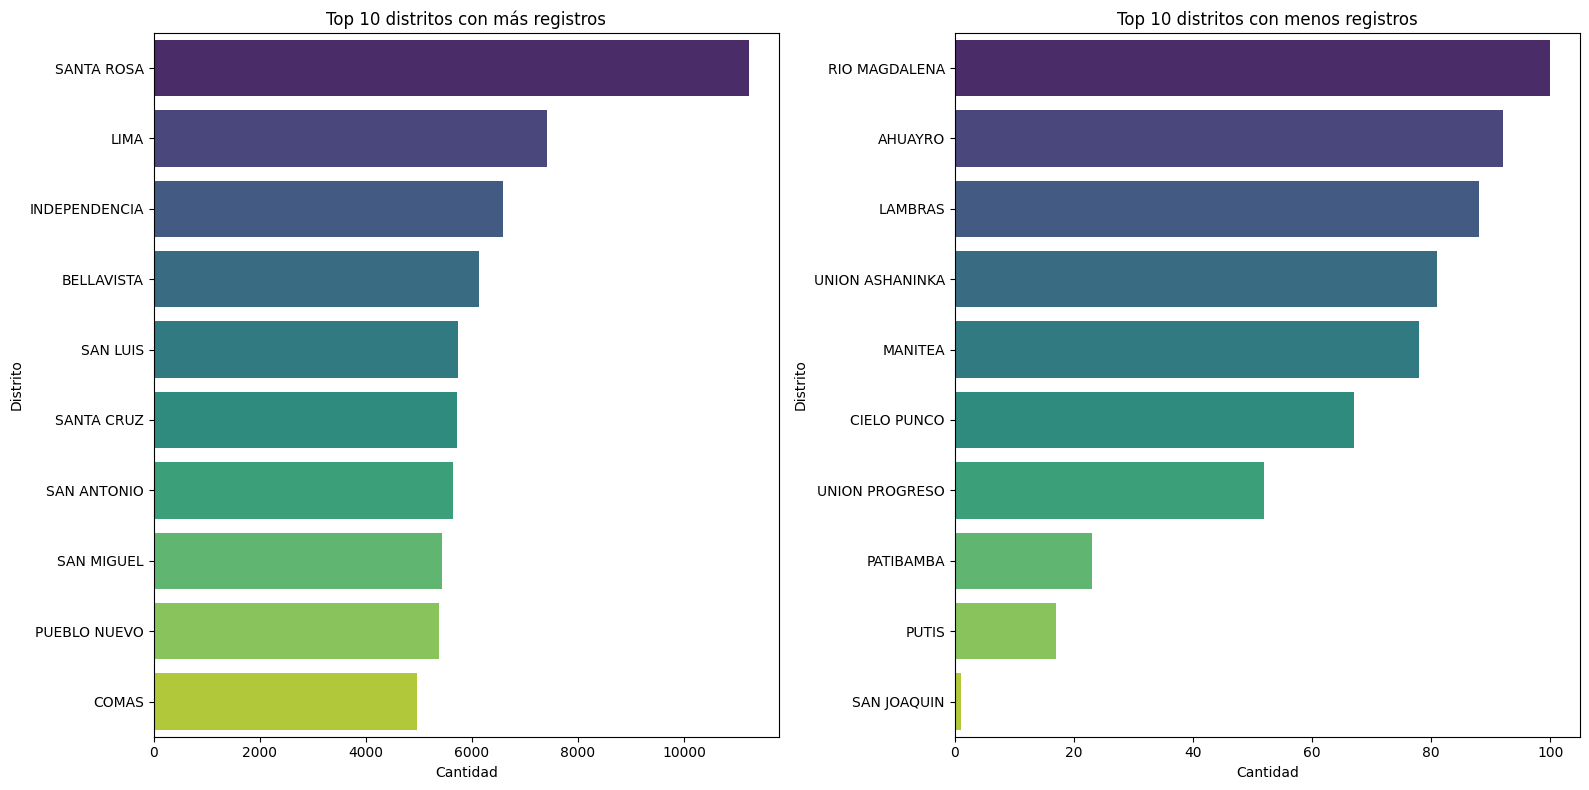

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular frecuencias por distrito
frecuencias = df['distrito'].value_counts()

# Top 10 distritos con más registros
top_10_altas = frecuencias.head(10)

# Top 10 distritos con menos registros
top_10_bajas = frecuencias.tail(10)

# Crear DataFrames auxiliares
df_top_altas = pd.DataFrame({
    'Distrito': top_10_altas.index,
    'Frecuencia': top_10_altas.values
})

df_top_bajas = pd.DataFrame({
    'Distrito': top_10_bajas.index,
    'Frecuencia': top_10_bajas.values
})

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico top 10 altas
sns.barplot(
    data=df_top_altas,
    y='Distrito',
    x='Frecuencia',
    hue='Distrito',
    palette='viridis',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Top 10 distritos con más registros')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Distrito')

# Gráfico top 10 bajas
sns.barplot(
    data=df_top_bajas,
    y='Distrito',
    x='Frecuencia',
    hue='Distrito',
    palette='viridis',
    legend=False,
    ax=axes[1]
)
axes[1].set_title('Top 10 distritos con menos registros')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('Distrito')

plt.tight_layout()
plt.show()


### Análisis Univariado para año

**PREGUNTA: Deberíamos usar solo pos-pandemia???**

In [19]:
# Crear tabla combinada de conteo y porcentaje para la columna 'ano'
tabla_univariado_ano = pd.DataFrame({
    'Frecuencia': df['ano'].value_counts(),
    'Porcentaje': (df['ano'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'ano':")
tabla_univariado_ano


Análisis univariado de la columna 'ano':


,Frecuencia,Porcentaje
ano,,
2018,95807,4.47
2019,95344,4.45
2008,94929,4.43
2023,94836,4.42
2017,94455,4.41
2016,94166,4.39
2014,93984,4.38
2010,92869,4.33
2013,92465,4.31


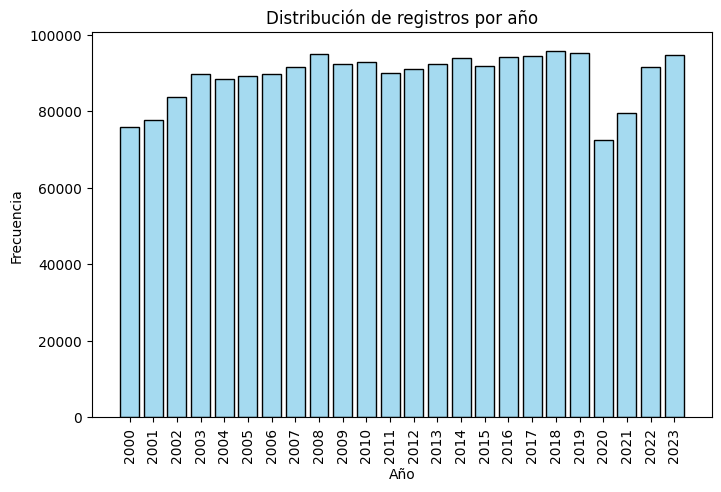

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener todos los años únicos ordenados
all_years = sorted(df['ano'].unique())

plt.figure(figsize=(8, 5))

# Histograma
ax = sns.histplot(
    data=df,
    x='ano',
    discrete=True,
    shrink=0.8,
    color='skyblue'
)

# Forzar etiquetas del eje X en vertical
ax.set_xticks(all_years)
ax.set_xticklabels(all_years, rotation=90)

plt.title('Distribución de registros por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


#### Detección de outliers para año

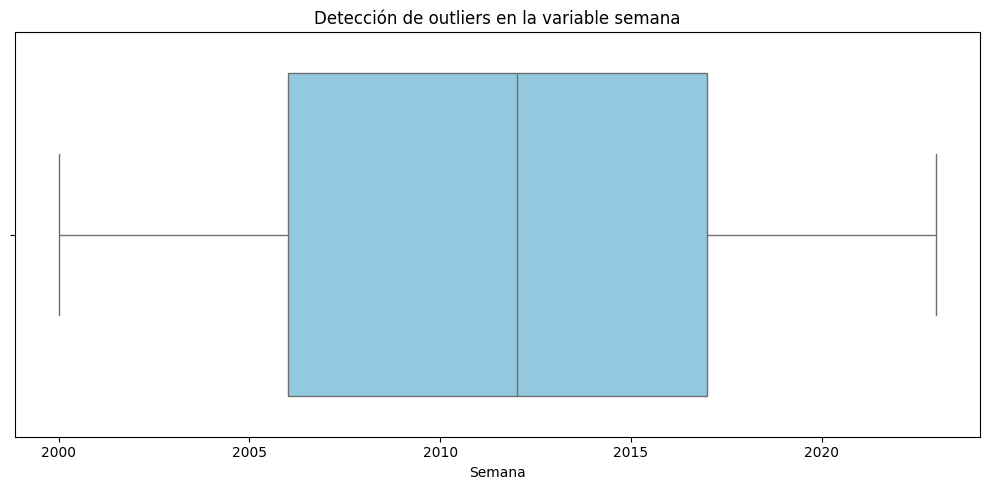

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Boxplot de la cantidad de registros por semana (simple)
sns.boxplot(
    x=df['ano'],
    color='skyblue'
)

plt.title('Detección de outliers en la variable semana')
plt.xlabel('Semana')
plt.tight_layout()  # para que no se corte
plt.show()


### Análisis Univariado para semana

In [22]:
# Crear tabla combinada de conteo y porcentaje para la columna 'semana'
tabla_univariado_semana = pd.DataFrame({
    'Frecuencia': df['semana'].value_counts(),
    'Porcentaje': (df['semana'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'semana':")
tabla_univariado_semana


Análisis univariado de la columna 'semana':


,Frecuencia,Porcentaje
semana,,
28,42164,1.97
32,42108,1.96
37,42095,1.96
27,42069,1.96
29,42063,1.96
45,42022,1.96
46,42007,1.96
23,41991,1.96
36,41940,1.96


In [23]:
df_query = df.query('semana == 0')
df_query

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
1446244,LIMA,LIMA,CARABAYLLO,2021,0,51,150106,1,0,0,0,0,0,0


Vamos a proceder a eliminar esta información de semana 0 porque solo representa 1 registro de todo Lima en la semana epidemiológica 0.

In [24]:
df = df.query('semana != 0')


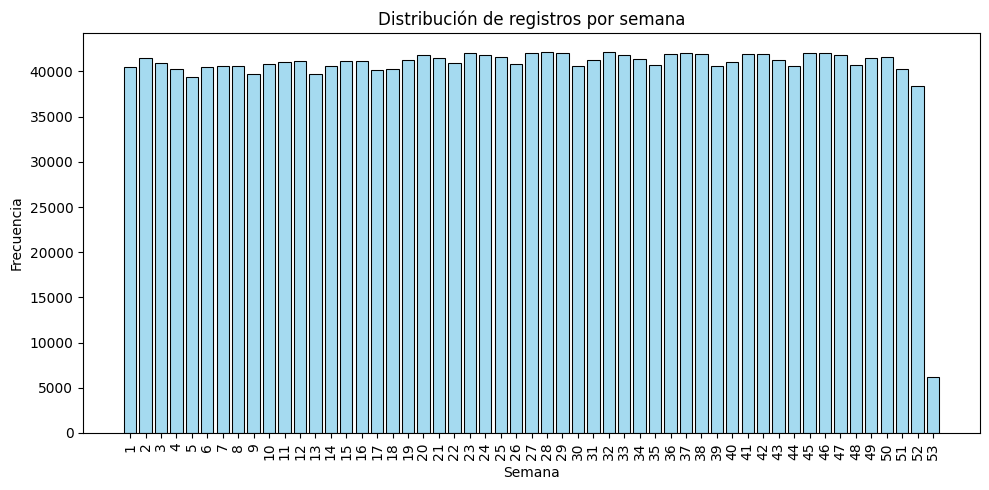

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener todas las semanas únicas ordenadas
all_weeks = sorted(df['semana'].unique())

plt.figure(figsize=(10, 5))  # puedes ajustar el tamaño si hay muchas semanas

# Histograma
ax = sns.histplot(
    data=df,
    x='semana',
    discrete=True,
    shrink=0.8,
    color='skyblue'
)

# Forzar etiquetas del eje X en vertical
ax.set_xticks(all_weeks)
ax.set_xticklabels(all_weeks, rotation=90)

plt.title('Distribución de registros por semana')
plt.xlabel('Semana')
plt.ylabel('Frecuencia')
plt.tight_layout()  # evitar que se corten las etiquetas
plt.show()


Vamos a eliminar la semana 53, ya que contiene pocos registros. Esto se debe a que, en estos estudios de vigilancia epidemiológica, al término del proyecto la cantidad de personas disminuye (puesto que la vigilancia llega a su fin).

In [26]:
df = df.query('semana != 53')


#### Detección de outliers para semana

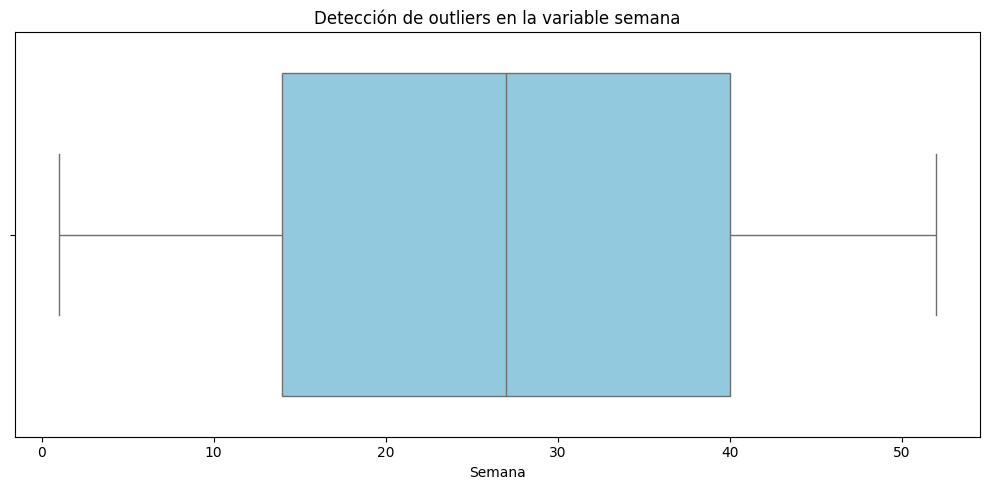

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Boxplot de la cantidad de registros por semana
sns.boxplot(
    x=df['semana'],
    color='skyblue'
)

plt.title('Detección de outliers en la variable semana')
plt.xlabel('Semana')
plt.tight_layout()  # para que no se corte
plt.show()


### Análisis Univariado para sub_reg_nt

In [28]:
# Crear tabla combinada de conteo y porcentaje para la columna 'sub_reg_nt'
tabla_univariado_sub_reg_nt = pd.DataFrame({
    'Frecuencia': df['sub_reg_nt'].value_counts(),
    'Porcentaje': (df['sub_reg_nt'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'sub_reg_nt':")
tabla_univariado_sub_reg_nt


Análisis univariado de la columna 'sub_reg_nt':


,Frecuencia,Porcentaje
sub_reg_nt,,
2,163142,7.63
12,135243,6.33
8,130592,6.11
4,125442,5.87
42,115754,5.41
21,113526,5.31
9,112502,5.26
5,111425,5.21
13,99031,4.63


### Análisis Univariado para ubigeo

In [29]:
# Crear tabla combinada de conteo y porcentaje para la columna 'ubigeo'
tabla_univariado_ubigeo = pd.DataFrame({
    'Frecuencia': df['ubigeo'].value_counts(),
    'Porcentaje': (df['ubigeo'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'ubigeo':")
tabla_univariado_ubigeo


Análisis univariado de la columna 'ubigeo':


,Frecuencia,Porcentaje
ubigeo,,
150101,7397,0.35
150132,4734,0.22
150140,4206,0.20
150135,4097,0.19
150103,3889,0.18
...,...,...
151010,49,0.00
221006,43,0.00
50515,23,0.00


Aún cuando tenemos como objetivo de proyecto poder predecir la cantidad de casos de hospitalizaciones en niños menores de 5 años, vamos a evaluar también la población de personas mayores de 60 años, puesto que resulta importante entender el contexto global de la salud pública.

### Análisis Univariado para ira_no_neumonia

In [30]:
# Crear tabla combinada de conteo y porcentaje para la columna 'ira_no_neumonia'
tabla_univariado_ira_no_neumonia = pd.DataFrame({
    'Frecuencia': df['ira_no_neumonia'].value_counts(),
    'Porcentaje': (df['ira_no_neumonia'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'ira_no_neumonia':")
tabla_univariado_ira_no_neumonia


Análisis univariado de la columna 'ira_no_neumonia':


,Frecuencia,Porcentaje
ira_no_neumonia,,
1,212521,9.94
2,164934,7.72
3,136269,6.37
4,116426,5.45
5,102087,4.78
...,...,...
1273,1,0.00
1752,1,0.00
1687,1,0.00


#### Detección de outliers para ira_no_neumonia

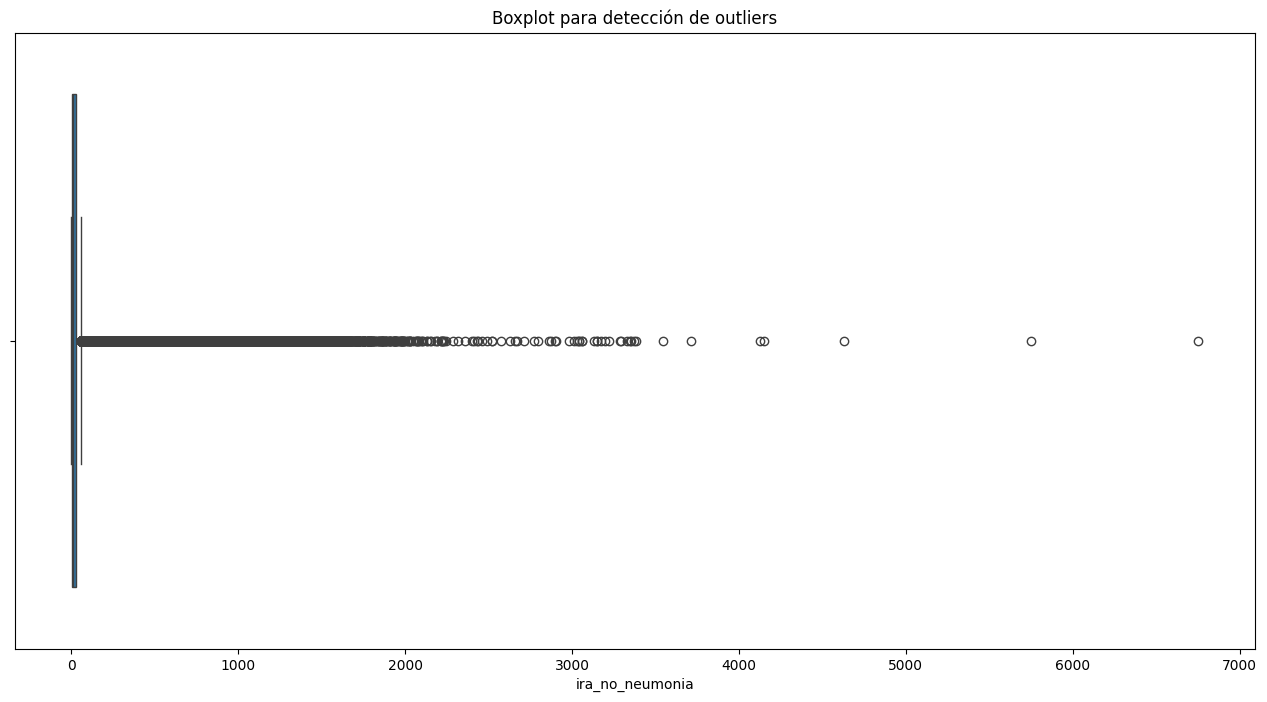

In [31]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['ira_no_neumonia'])
plt.title('Boxplot para detección de outliers')
plt.show()


In [32]:
df_query = df.query('ira_no_neumonia > 3200')
df_query


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
1512779,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2001,32,50,150132,5747,9,0,3,0,0,0
1513283,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,1,50,150132,3383,17,0,7,0,0,0
1513286,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,2,50,150132,3291,21,0,9,0,1,0
1513323,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,13,50,150132,3547,15,0,4,0,0,0
1513327,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,14,50,150132,3221,23,0,7,0,0,0
1513331,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,15,50,150132,3715,20,0,8,0,0,0
1513338,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,17,50,150132,4151,30,0,8,0,0,0
1513344,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,19,50,150132,4627,24,0,13,0,0,0
1513348,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,20,50,150132,4124,17,0,9,0,0,0
1513356,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,22,50,150132,6753,22,0,13,0,0,0


Aquí nos preguntamos si estos valores representan necesariamente outliers. Al revisar los registros, observamos que corresponden al caso de San Juan de Lurigancho, donde se concentra la mayor cantidad de casos de ira_no_neumonia. Sin embargo, esto se debe a que, en este tipo de proyectos de seguimiento longitudinal de datos clínicos, la población total es una cantidad esperada que será objeto de estudio; por ello, no resulta inusual encontrar valores muy atípicos. Por ejemplo, vemos que en el año 2005, durante la semana 1, se registraron 3,383 personas que no tenían neumonía, y que con el pasar de las semanas esta cifra fue incrementándose hasta alcanzar un tope de 6,753 personas.

In [33]:
df_query = df.query('ira_no_neumonia > 4000')
df_query


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
1512779,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2001,32,50,150132,5747,9,0,3,0,0,0
1513338,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,17,50,150132,4151,30,0,8,0,0,0
1513344,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,19,50,150132,4627,24,0,13,0,0,0
1513348,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,20,50,150132,4124,17,0,9,0,0,0
1513356,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2005,22,50,150132,6753,22,0,13,0,0,0


Sin embargo vemos que hay saltos muy considerables como los que son por encima de 4000, podrían considerarse como valores esperados en un contexto de vigilancia epidemiologica si de forma progresiva vieramos que entre semana y semana tienens valores cercanos, sin embargo vemos que en 2005 de la semana 20 pasaron de 4000 casos que quean ira_no_neumonia a 6753 casos en la semana 22, por lo tanto vamos a eliminar todos esos regustros donde ira_no_neumonia sea mayor a 4000

In [34]:
df = df.query('ira_no_neumonia <= 4000')


### Análisis Univariado para neumonias_men5

In [35]:
# Crear tabla combinada de conteo y porcentaje para la columna 'neumonias_men5'
tabla_univariado_neumonias_men5 = pd.DataFrame({
    'Frecuencia': df['neumonias_men5'].value_counts(),
    'Porcentaje': (df['neumonias_men5'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'neumonias_men5':")
tabla_univariado_neumonias_men5


Análisis univariado de la columna 'neumonias_men5':


,Frecuencia,Porcentaje
neumonias_men5,,
0,1806409,84.50
1,172935,8.09
2,65364,3.06
3,30936,1.45
4,18132,0.85
...,...,...
86,1,0.00
76,1,0.00
87,1,0.00


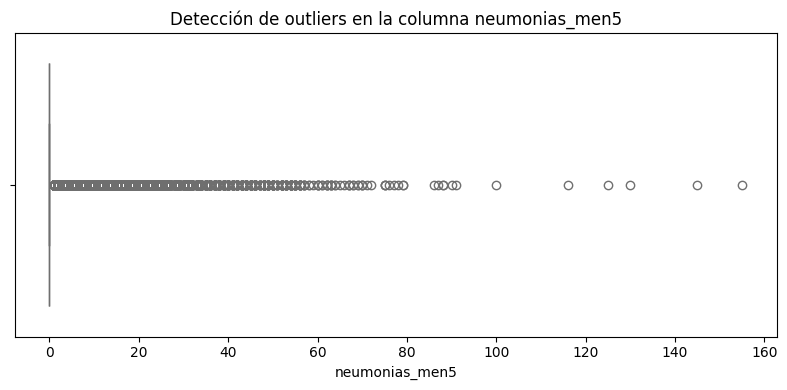

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Boxplot de la columna neumonias_men5
sns.boxplot(
    x=df['neumonias_men5'],
    color='skyblue'
)

plt.title('Detección de outliers en la columna neumonias_men5')
plt.xlabel('neumonias_men5')
plt.tight_layout()
plt.show()


In [37]:
df_query = df.query('neumonias_men5 > 95')
df_query


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
1676629,LORETO,MAYNAS,IQUITOS,2000,21,16,160101,1101,116,0,30,0,0,0
1676630,LORETO,MAYNAS,IQUITOS,2000,22,16,160101,1819,130,0,34,0,0,0
1676631,LORETO,MAYNAS,IQUITOS,2000,23,16,160101,1547,155,0,41,0,1,0
1676632,LORETO,MAYNAS,IQUITOS,2000,24,16,160101,1304,125,0,41,0,1,0
1676633,LORETO,MAYNAS,IQUITOS,2000,25,16,160101,1153,100,0,33,0,1,0
1677010,LORETO,MAYNAS,IQUITOS,2006,23,16,160101,569,145,19,8,2,0,0


Se puede evidenciar un brote de neumonía en niños menores de 5 años en el distrito de Iquitos durante el año 2000, específicamente entre las semanas 21 y 25. Sin embargo, en la semana 23 del año 2006 se registraron 145 casos de neumonía en niños de 5 años. No se observan semanas anteriores o posteriores con una tendencia creciente que justifique este valor, por lo que se considera un valor atípico (outlier).

In [38]:
df_query = df.query('neumonias_men5 == 145')
df_query


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
1677010,LORETO,MAYNAS,IQUITOS,2006,23,16,160101,569,145,19,8,2,0,0


In [39]:
df = df[df['neumonias_men5'] != 145]


### Análisis Univariado para neumonias_60mas

In [40]:
# Crear tabla combinada de conteo y porcentaje para la columna 'neumonias_60mas'
tabla_univariado_neumonias_60mas = pd.DataFrame({
    'Frecuencia': df['neumonias_60mas'].value_counts(),
    'Porcentaje': (df['neumonias_60mas'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'neumonias_60mas':")
tabla_univariado_neumonias_60mas


Análisis univariado de la columna 'neumonias_60mas':


,Frecuencia,Porcentaje
neumonias_60mas,,
0,2028342,94.88
1,64103,3.00
2,19477,0.91
3,8802,0.41
4,4920,0.23
...,...,...
176,1,0.00
128,1,0.00
148,1,0.00


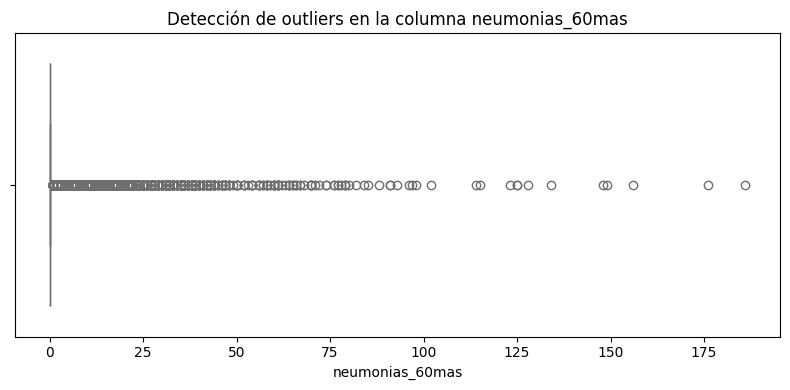

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

sns.boxplot(
    x=df['neumonias_60mas'],
    color='skyblue'
)

plt.title('Detección de outliers en la columna neumonias_60mas')
plt.xlabel('neumonias_60mas')
plt.tight_layout()
plt.show()


In [42]:
df_query = df.query('neumonias_60mas > 100')
df_query


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
737600,CALLAO,CALLAO,BELLAVISTA,2010,46,7,70102,331,2,156,0,0,0,0
1172306,JUNIN,CONCEPCION,CONCEPCION,2021,50,12,120201,6,0,149,0,0,0,0
1467778,LIMA,LIMA,JESUS MARIA,2023,18,50,150113,1281,35,114,20,39,0,0
1811561,PIURA,PIURA,CASTILLA,2021,1,32,200104,41,0,115,0,115,0,43
1811563,PIURA,PIURA,CASTILLA,2021,3,32,200104,40,0,102,0,102,0,57
1811572,PIURA,PIURA,CASTILLA,2021,11,32,200104,54,0,123,0,123,0,52
1811573,PIURA,PIURA,CASTILLA,2021,12,32,200104,60,0,134,0,134,0,62
1811574,PIURA,PIURA,CASTILLA,2021,13,32,200104,54,1,176,0,176,0,68
1811575,PIURA,PIURA,CASTILLA,2021,14,32,200104,59,0,186,0,186,0,180
1811576,PIURA,PIURA,CASTILLA,2021,15,32,200104,57,0,148,0,148,0,67


Se puede observar que hubo un aumento significativo en los casos de neumonías en personas de 60 años a más, especialmente concentrado en el distrito de Castilla, provincia de Piura, durante el año 2021 (semanas 1 a la 18). También se identifican registros elevados en Bellavista (Callao) en el año 2010, en Concepción (Junín) en 2021 y en Jesús María (Lima) en 2023. Estos valores destacan como outliers respecto al resto del dataset.

### Análisis Univariado para hospitalizados_men5

In [43]:
# Crear tabla combinada de conteo y porcentaje para la columna 'hospitalizados_men5'
tabla_univariado_hospitalizados_men5 = pd.DataFrame({
    'Frecuencia': df['hospitalizados_men5'].value_counts(),
    'Porcentaje': (df['hospitalizados_men5'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'hospitalizados_men5':")
tabla_univariado_hospitalizados_men5


Análisis univariado de la columna 'hospitalizados_men5':


,Frecuencia,Porcentaje
hospitalizados_men5,,
0,1999724,93.54
1,85818,4.01
2,25724,1.20
3,10972,0.51
4,5635,0.26
5,3150,0.15
6,2001,0.09
7,1267,0.06
8,917,0.04


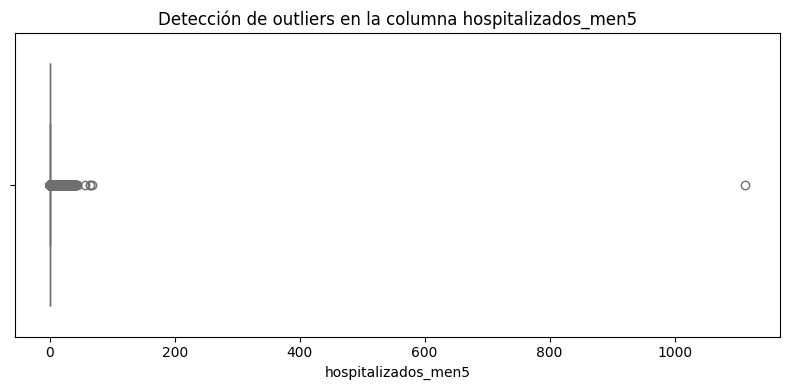

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

sns.boxplot(
    x=df['hospitalizados_men5'],
    color='skyblue'
)

plt.title('Detección de outliers en la columna hospitalizados_men5')
plt.xlabel('hospitalizados_men5')
plt.tight_layout()
plt.show()


In [45]:
df_query = df.query('hospitalizados_men5 > 1000')
df_query

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
1187523,JUNIN,CHANCHAMAYO,CHANCHAMAYO,2001,22,12,120301,88,3,0,1113,0,0,0


Aquí de acuerdo a este registro hemos detectado que en el distrito de chanchamayo hubo 1113 niños hospitalizados, lo cual muy posiblemente se trate de un error de cómputo, lo vamos a considerar un caso anómalo por lo que vamos a eliminarlo

In [46]:
df = df.query('hospitalizados_men5 < 1000')

### Análisis Univariado para hospitalizados_60mas

In [47]:
# Crear tabla combinada de conteo y porcentaje para la columna 'hospitalizados_60mas'
tabla_univariado_hospitalizados_60mas = pd.DataFrame({
    'Frecuencia': df['hospitalizados_60mas'].value_counts(),
    'Porcentaje': (df['hospitalizados_60mas'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'hospitalizados_60mas':")
tabla_univariado_hospitalizados_60mas


Análisis univariado de la columna 'hospitalizados_60mas':


,Frecuencia,Porcentaje
hospitalizados_60mas,,
0,2079317,97.27
1,39211,1.83
2,10288,0.48
3,4079,0.19
4,1903,0.09
...,...,...
128,1,0.00
54,1,0.00
41,1,0.00


### Análisis Univariado para defunciones_men5

In [48]:
# Crear tabla combinada de conteo y porcentaje para la columna 'defunciones_men5'
tabla_univariado_defunciones_men5 = pd.DataFrame({
    'Frecuencia': df['defunciones_men5'].value_counts(),
    'Porcentaje': (df['defunciones_men5'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'defunciones_men5':")
tabla_univariado_defunciones_men5


Análisis univariado de la columna 'defunciones_men5':


,Frecuencia,Porcentaje
defunciones_men5,,
0,2128778,99.58
1,8328,0.39
2,523,0.02
3,68,0.00
4,19,0.00
5,8,0.00
7,2,0.00
6,2,0.00
24,1,0.00


### Análisis Univariado para defunciones_60mas

In [49]:
# Crear tabla combinada de conteo y porcentaje para la columna 'defunciones_60mas'
tabla_univariado_defunciones_60mas = pd.DataFrame({
    'Frecuencia': df['defunciones_60mas'].value_counts(),
    'Porcentaje': (df['defunciones_60mas'].value_counts(normalize=True) * 100).round(2)
})

# Mostrar tabla
print("Análisis univariado de la columna 'defunciones_60mas':")
tabla_univariado_defunciones_60mas.head(10)


Análisis univariado de la columna 'defunciones_60mas':


,Frecuencia,Porcentaje
defunciones_60mas,,
0,2122886,99.31
1,11613,0.54
2,1858,0.09
3,663,0.03
4,260,0.01
5,134,0.01
6,90,0.00
7,53,0.00
8,37,0.00


### Análisis multivariable

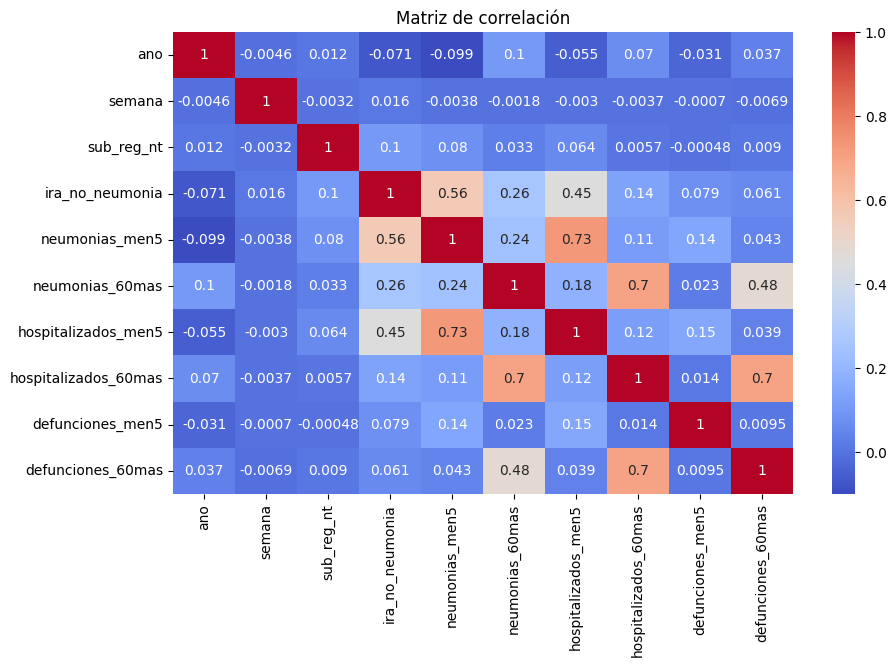

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlación
correlation_matrix = df.corr(numeric_only=True)

# Plot de correlación (heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Se puede observar algo interesante en la matriz de correlación. Existe una alta correlación entre los casos de neumonía en niños menores de 5 años y los hospitalizados en el mismo grupo etario, lo cual es lógico, ya que muchos casos graves requieren hospitalización. De manera similar, los casos de neumonía en personas mayores de 60 años también presentan una alta correlación con las defunciones en ese grupo, lo que indica una mayor vulnerabilidad en estos pacientes. Esto es coherente con el hecho de que, en muchos casos, los pacientes que fallecen fueron previamente hospitalizados debido a neumonía.

Sin embargo, este patrón no se repite en el caso de los niños menores de 5 años. Las defunciones en este grupo no presentan una correlación fuerte ni con los hospitalizados menores de 5 años ni con los casos de neumonía registrados, lo cual podría indicar una menor tasa de letalidad o una mejor respuesta al tratamiento en este grupo.

#### Año vs Hospitalizados menores de 5 años

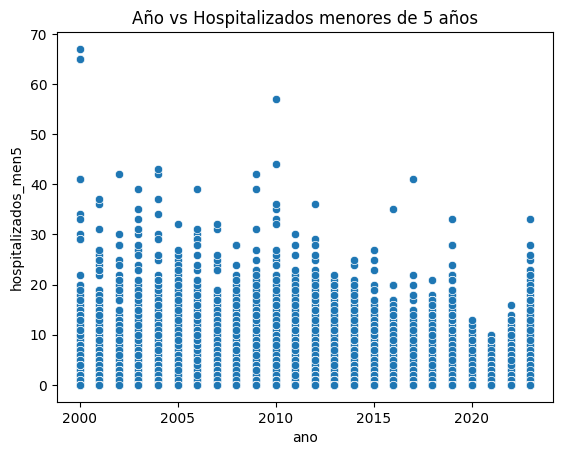

In [51]:
# Scatter plot ejemplo con una variable numérica
sns.scatterplot(x='ano', y='hospitalizados_men5', data=df)
plt.title('Año vs Hospitalizados menores de 5 años')
plt.show()


#### Semana vs Hospitalizados menores de 5 años

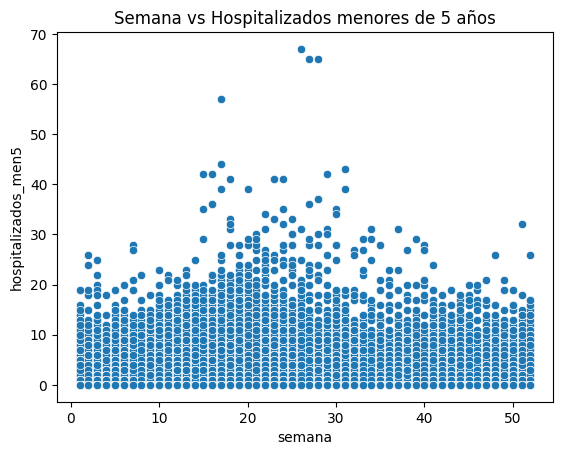

In [52]:

# Scatter plot ejemplo con una variable numérica
sns.scatterplot(x='semana', y='hospitalizados_men5', data=df)
plt.title('Semana vs Hospitalizados menores de 5 años')
plt.show()


#### Casos de ira no neumonia vs Hospitalizados menores de 5 años

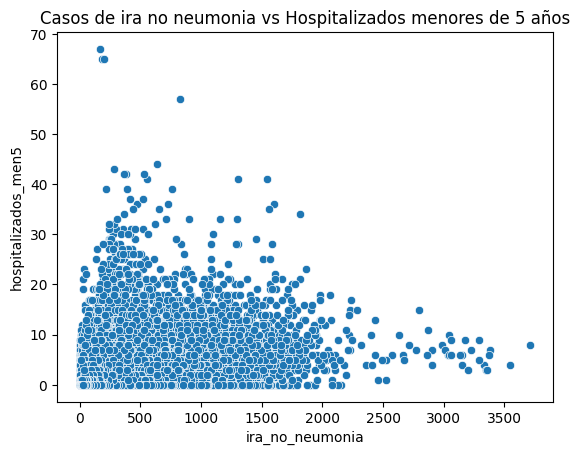

In [53]:

# Scatter plot ejemplo con una variable numérica
sns.scatterplot(x='ira_no_neumonia', y='hospitalizados_men5', data=df)
plt.title('Casos de ira no neumonia vs Hospitalizados menores de 5 años')
plt.show()


#### Neumonía en menores de 5 años vs Hospitalizados menores de 5 años

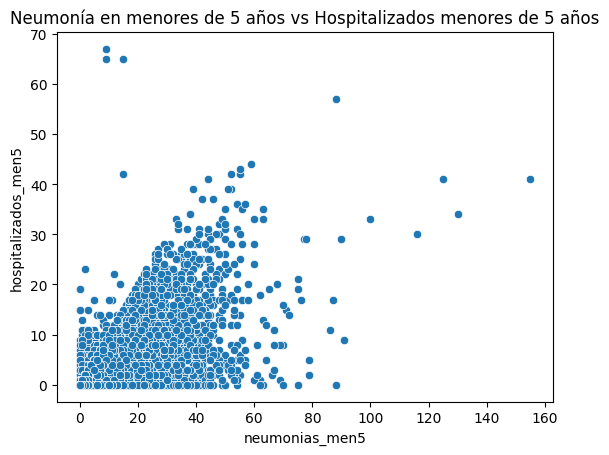

In [54]:

# Scatter plot ejemplo con una variable numérica
sns.scatterplot(x='neumonias_men5', y='hospitalizados_men5', data=df)
plt.title('Neumonía en menores de 5 años vs Hospitalizados menores de 5 años')
plt.show()


#### Neumonía en mayores de 60 años vs Hospitalizados menores de 5 años

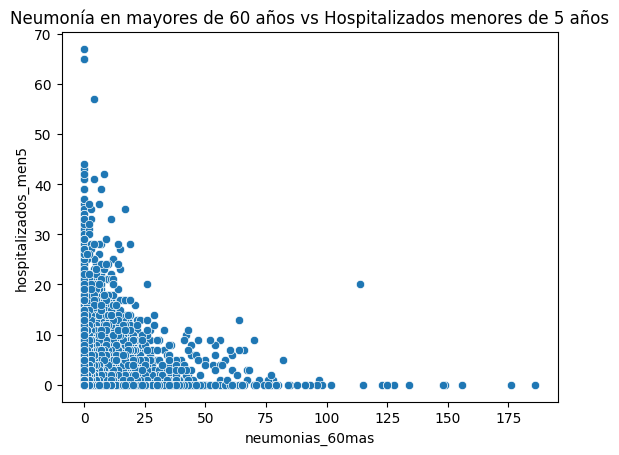

In [55]:

# Scatter plot ejemplo con una variable numérica
sns.scatterplot(x='neumonias_60mas', y='hospitalizados_men5', data=df)
plt.title('Neumonía en mayores de 60 años vs Hospitalizados menores de 5 años')
plt.show()


#### Hospitalizados mayores de 60 años vs Hospitalizados menores de 5 años

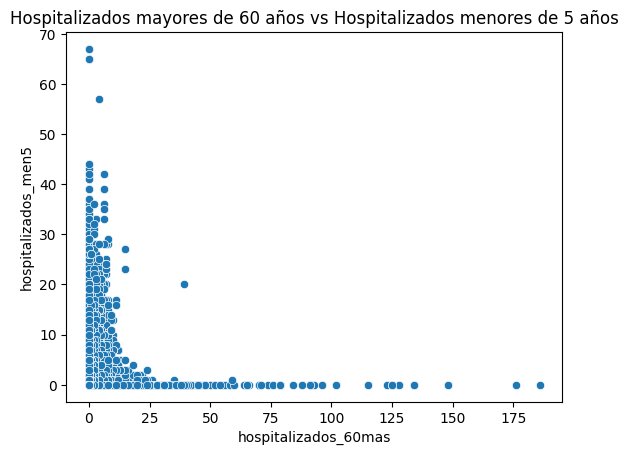

In [56]:

# Scatter plot ejemplo con una variable numérica
sns.scatterplot(x='hospitalizados_60mas', y='hospitalizados_men5', data=df)
plt.title('Hospitalizados mayores de 60 años vs Hospitalizados menores de 5 años')
plt.show()


#### Defunciones menores de 5 años vs Hospitalizados menores de 5 años

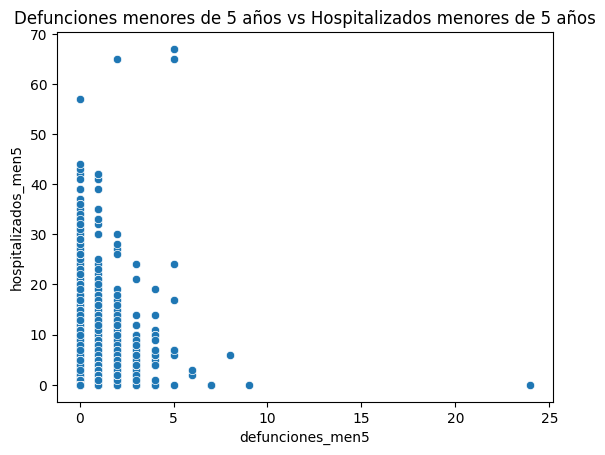

In [57]:

# Scatter plot ejemplo con una variable numérica
sns.scatterplot(x='defunciones_men5', y='hospitalizados_men5', data=df)
plt.title('Defunciones menores de 5 años vs Hospitalizados menores de 5 años')
plt.show()


#### Defunciones mayores de 60 años vs Hospitalizados menores de 5 años

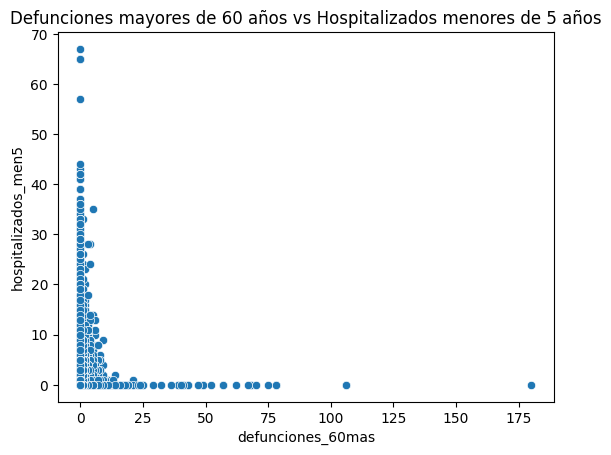

In [58]:

# Scatter plot ejemplo con una variable numérica
sns.scatterplot(x='defunciones_60mas', y='hospitalizados_men5', data=df)
plt.title('Defunciones mayores de 60 años vs Hospitalizados menores de 5 años')
plt.show()


In [59]:
df["departamento"].value_counts().get("LIMA", 0)


np.int64(251449)

##  Analizando variable principal: hospitalizados_men5

### Estadísticas Descriptivas

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Estadísticas Descriptivas
desc_stats = df['hospitalizados_men5'].describe()
sesgo = df['hospitalizados_men5'].skew()
curtosis = df['hospitalizados_men5'].kurt()

# Mostrar resumen
print("📌 Estadísticas Descriptivas:")
print(desc_stats)
print(f"\n📈 Sesgo: {sesgo}")
print(f"📉 Curtosis: {curtosis}")

📌 Estadísticas Descriptivas:
count    2.137731e+06
mean     1.258858e-01
std      7.180879e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.700000e+01
Name: hospitalizados_men5, dtype: float64

📈 Sesgo: 14.595468659667485
📉 Curtosis: 441.3409221356496



*   Sesgo: La mayoría de los distritos y semanas no tienen hospitalizaciones de niños menores de 5 años, pero en algunos casos puntuales se reportaron muchísimas hospitalizaciones.

*   Curtosis: Interpretación: Hay muchísimos ceros (como ya lo vimos en el percentil 75%, que es 0), y unos pocos valores muy altos que hacen que el promedio se aleje mucho de la mediana.





###  1.1 Visualización con Outliers (df_exploracion)

In [62]:
percentil1 = df['hospitalizados_men5'].quantile(0.99999)
print(percentil1)

35.0


#### Evaluando percentiles

In [63]:
# Definir el percentil 99
p99 = df['hospitalizados_men5'].quantile(0.99999)

# Crear los dos dataframes
df_exploracion = df.copy()  # contiene todo
df_sin_outliers = df[df['hospitalizados_men5'] <= p99].copy()  # elimina solo lo más extremo


---

In [64]:
df_sin_outliers.tail()

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
2143980,UCAYALI,PURUS,PURUS,2023,48,25,250401,41,0,0,0,0,0,0
2143981,UCAYALI,PURUS,PURUS,2023,49,25,250401,51,0,0,0,0,0,0
2143982,UCAYALI,PURUS,PURUS,2023,50,25,250401,55,0,0,0,0,0,0
2143983,UCAYALI,PURUS,PURUS,2023,51,25,250401,36,0,0,0,0,0,0
2143984,UCAYALI,PURUS,PURUS,2023,52,25,250401,31,0,0,0,0,0,0


In [65]:
# Estadísticas Descriptivas
desc_stats = df_sin_outliers['hospitalizados_men5'].describe()
sesgo = df_sin_outliers['hospitalizados_men5'].skew()
curtosis = df_sin_outliers['hospitalizados_men5'].kurt()

# Mostrar resumen
print("📌 Estadísticas Descriptivas:")
print(desc_stats)
print(f"\n📈 Sesgo: {sesgo}")
print(f"📉 Curtosis: {curtosis}")

📌 Estadísticas Descriptivas:
count    2.137711e+06
mean     1.254711e-01
std      7.045193e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.500000e+01
Name: hospitalizados_men5, dtype: float64

📈 Sesgo: 12.738020885144197
📉 Curtosis: 275.1676671382706


In [66]:
# Ver los más extremos
df_sin_outliers.sort_values('hospitalizados_men5', ascending=False).head(10)


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
1686325,LORETO,MAYNAS,PUNCHANA,2010,15,16,160108,655,50,3,35,0,1,0
1515604,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2016,24,50,150132,1563,56,17,35,6,0,5
348526,AREQUIPA,AREQUIPA,AREQUIPA,2003,30,4,40101,438,63,0,35,0,1,0
1676630,LORETO,MAYNAS,IQUITOS,2000,22,16,160101,1819,130,0,34,0,0,0
348597,AREQUIPA,AREQUIPA,AREQUIPA,2004,30,4,40101,364,38,0,34,0,0,0
1516293,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2019,23,50,150132,1300,60,11,33,6,0,1
1438611,LIMA,LIMA,ATE,2023,18,52,150103,899,49,3,33,3,0,0
1677278,LORETO,MAYNAS,IQUITOS,2010,18,16,160101,710,63,0,33,0,1,0
1819597,PIURA,PIURA,TAMBO GRANDE,2003,23,31,200114,306,33,0,33,0,0,0
1676633,LORETO,MAYNAS,IQUITOS,2000,25,16,160101,1153,100,0,33,0,1,0


---

In [67]:
# Si percentil 99 fue 42:
df_outliers = df[df['hospitalizados_men5'] > 35]

# Ver los más extremos
df_outliers.sort_values('hospitalizados_men5', ascending=False).head(10)


,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
994058,HUANUCO,HUANUCO,HUANUCO,2000,26,10,100101,169,9,0,67,0,5,0
994059,HUANUCO,HUANUCO,HUANUCO,2000,27,10,100101,188,15,0,65,0,5,0
994060,HUANUCO,HUANUCO,HUANUCO,2000,28,10,100101,205,9,0,65,0,2,0
1686328,LORETO,MAYNAS,PUNCHANA,2010,17,16,160108,825,88,4,57,4,0,0
1677277,LORETO,MAYNAS,IQUITOS,2010,17,16,160101,637,59,0,44,0,0,0
348599,AREQUIPA,AREQUIPA,AREQUIPA,2004,31,4,40101,281,55,0,43,0,0,0
348595,AREQUIPA,AREQUIPA,AREQUIPA,2004,29,4,40101,380,55,0,42,0,0,0
1863574,PIURA,SULLANA,SULLANA,2002,15,31,200601,370,15,0,42,0,1,0
1686273,LORETO,MAYNAS,PUNCHANA,2009,16,16,160108,530,52,8,42,6,1,0
1676632,LORETO,MAYNAS,IQUITOS,2000,24,16,160101,1304,125,0,41,0,1,0


#### Histograma

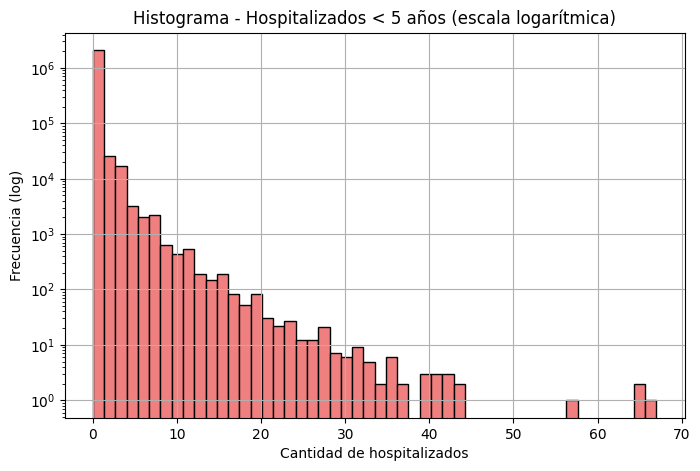

In [68]:
plt.figure(figsize=(8, 5))
plt.hist(df_exploracion['hospitalizados_men5'], bins=50, color='lightcoral', edgecolor='black', log=True)
plt.title('Histograma - Hospitalizados < 5 años (escala logarítmica)')
plt.xlabel('Cantidad de hospitalizados')
plt.ylabel('Frecuencia (log)')
plt.grid(True)
plt.show()


La escala logarítmica evidencia claramente la presencia de outliers que, aunque representan menos del 1% de los datos, podrían estar vinculados a eventos sanitarios críticos como brotes epidémicos. Esto justifica su análisis detallado antes de aplicar cualquier técnica de modelado o limpieza.

#### Boxplot

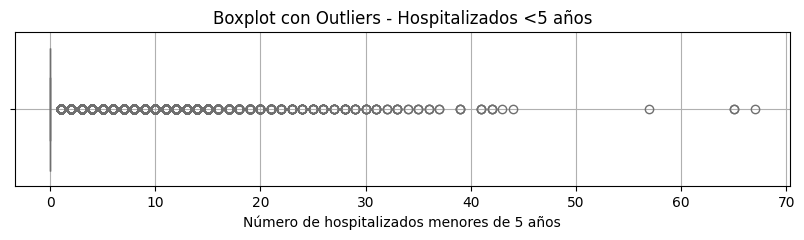

In [69]:
# Boxplot con outliers (df_exploracion)
plt.figure(figsize=(10, 2))
sns.boxplot(data=df_exploracion, x='hospitalizados_men5', color='skyblue')
plt.title('Boxplot con Outliers - Hospitalizados <5 años')
plt.xlabel('Número de hospitalizados menores de 5 años')
plt.grid(True)
plt.show()


Este gráfico evidencia la presencia de picos inusuales en hospitalizaciones que pueden estar asociados a situaciones excepcionales de salud pública. Aunque representan una porción mínima de la base de datos, estos outliers no deben eliminarse sin antes entender su contexto, ya que pueden ser indicadores importantes de brotes epidémicos o crisis sanitarias locales.

#### Gráfico de barras

C:\Users\quine\AppData\Local\Temp\ipykernel_3328\2072428991.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='distrito_ano', x='hospitalizados_men5', palette='Reds_r')


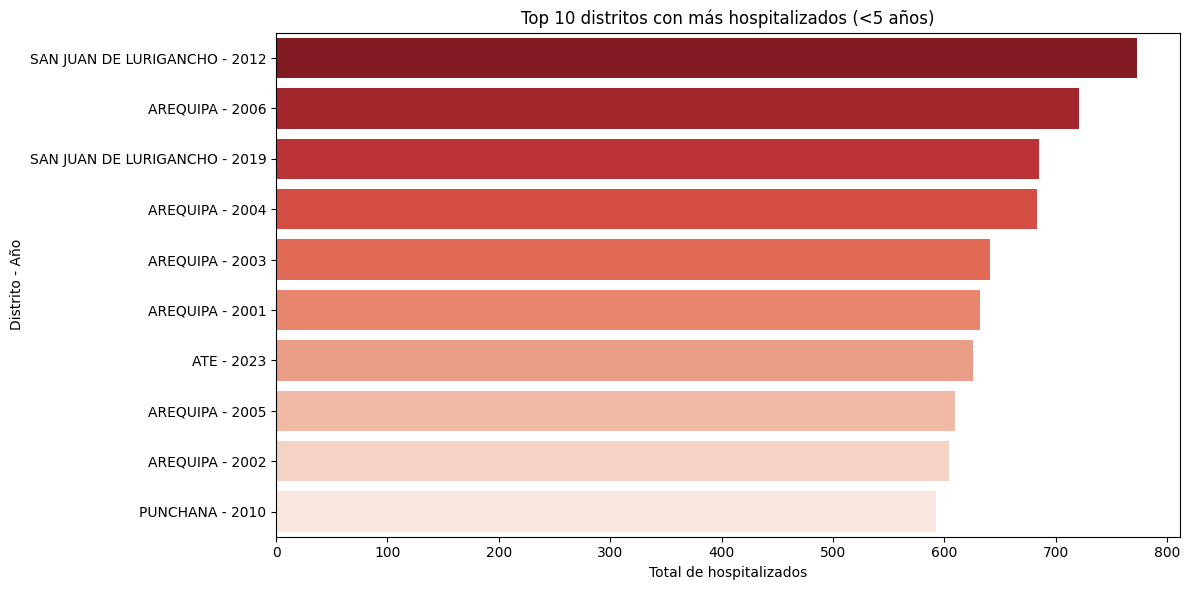

In [70]:
# Agrupar por distrito y año
top_distritos = df_exploracion.groupby(['distrito', 'ano'])['hospitalizados_men5'].sum().reset_index()

# Top 10 combinaciones
top10 = top_distritos.sort_values('hospitalizados_men5', ascending=False).head(10)

# Crear etiqueta combinada
top10['distrito_ano'] = top10['distrito'] + " - " + top10['ano'].astype(str)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, y='distrito_ano', x='hospitalizados_men5', palette='Reds_r')
plt.title('Top 10 distritos con más hospitalizados (<5 años)')
plt.xlabel('Total de hospitalizados')
plt.ylabel('Distrito - Año')
plt.tight_layout()
plt.show()



Este gráfico de barras identifica las 10 combinaciones de distrito y año con el mayor número de hospitalizaciones en menores de 5 años.

**Observaciones clave:**

* Chanchamayo en 2001 destaca significativamente como el valor más alto, con casi 1200 hospitalizaciones, muy por encima del resto. Esto refuerza su condición de outlier extremo, como ya se evidenció en el boxplot y el histograma logarítmico.

* San Juan de Lurigancho aparece en dos años distintos (2012 y 2019), lo cual puede indicar picos recurrentes en un distrito densamente poblado.

* Arequipa domina el gráfico con 6 apariciones consecutivas entre 2001 y 2006, lo que sugiere un comportamiento anómalo sistemático en esos años. Podría deberse a un error en la fuente de datos o a un evento epidémico sostenido.

* La presencia de ATE en 2023 puede representar un pico reciente, lo que amerita atención en el contexto actual de salud pública.

**Conclusión:**

Este gráfico permite priorizar la revisión de registros anómalos, ya sea por su magnitud o recurrencia. Es una herramienta clave para entender dónde y cuándo se concentran los casos extremos, y será útil para decidir si dichos registros deben ser tratados como errores, mantenidos por su relevancia o analizados con más detalle en estudios posteriores.

#### describe()

In [71]:
df_exploracion['hospitalizados_men5'].describe()

count    2.137731e+06
mean     1.258858e-01
std      7.180879e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.700000e+01
Name: hospitalizados_men5, dtype: float64

### 1.2 Visualización sin outliers (df_sin_outliers)


#### Boxplot

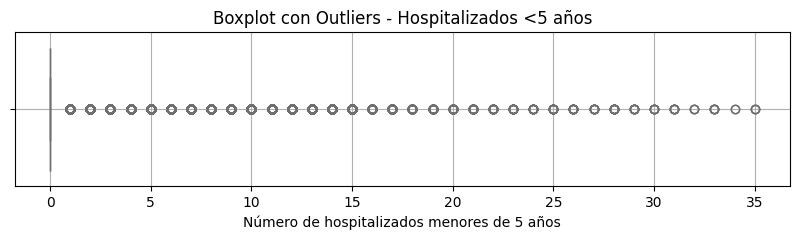

In [72]:
# Boxplot con outliers (df_exploracion)
plt.figure(figsize=(10, 2))
sns.boxplot(data=df_sin_outliers, x='hospitalizados_men5', color='skyblue')
plt.title('Boxplot con Outliers - Hospitalizados <5 años')
plt.xlabel('Número de hospitalizados menores de 5 años')
plt.grid(True)
plt.show()

* La mediana (línea dentro de la caja) está en 0, lo que indica que más del 50% de los registros no reportan hospitalizaciones de menores de 5 años. Esto puede estar relacionado con regiones con muy poca población, semanas con baja incidencia o ausencia de reporte.

* Primer y tercer cuartil: Tanto el Q1 (25%) como el Q3 (75%) están en 0, lo que significa que el 75% de los datos tiene valores nulos o muy bajos (0 hospitalizados).

* Valores fuera de la caja (lo que serían "picos" pero no se consideran outliers extremos aquí): Se identifican algunos puntos individuales en 1, 2 y 3 hospitalizados, que se encuentran fuera del rango intercuartílico pero no se consideran outliers severos tras el filtro aplicado. Estos casos muestran semanas donde sí hubo hospitalizaciones, pero fueron muy puntuales.

* Tendencia general: Altísima concentración en 0, lo que puede ser una limitación de registro o también reflejo de datos dispersos en semanas donde hubo pocos casos severos.

**Consideraciones para análisis posteriores:**

- Debido a esta concentración, se recomienda: Aplicar transformaciones si se utilizará para modelado (como log(1+x)).

- Analizar patrones regionales o temporales (por ejemplo, comparar veranos e inviernos).

#### Histograma

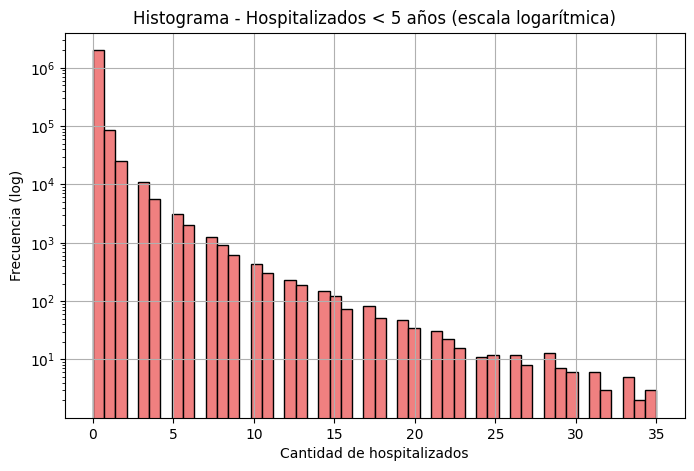

In [73]:
plt.figure(figsize=(8, 5))
plt.hist(df_sin_outliers['hospitalizados_men5'], bins=50, color='lightcoral', edgecolor='black', log=True)
plt.title('Histograma - Hospitalizados < 5 años (escala logarítmica)')
plt.xlabel('Cantidad de hospitalizados')
plt.ylabel('Frecuencia (log)')
plt.grid(True)
plt.show()



La distribución es fuertemente sesgada a la izquierda (positivamente sesgada), con una gran mayoría de valores en el rango bajo. Esta visualización justifica y respalda la decisión de haber removido outliers, permitiendo una representación fiel del comportamiento común de las hospitalizaciones.

#### Gráfico de barras

C:\Users\quine\AppData\Local\Temp\ipykernel_3328\1715120389.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y='distrito_ano', x='hospitalizados_men5', palette='Reds_r')


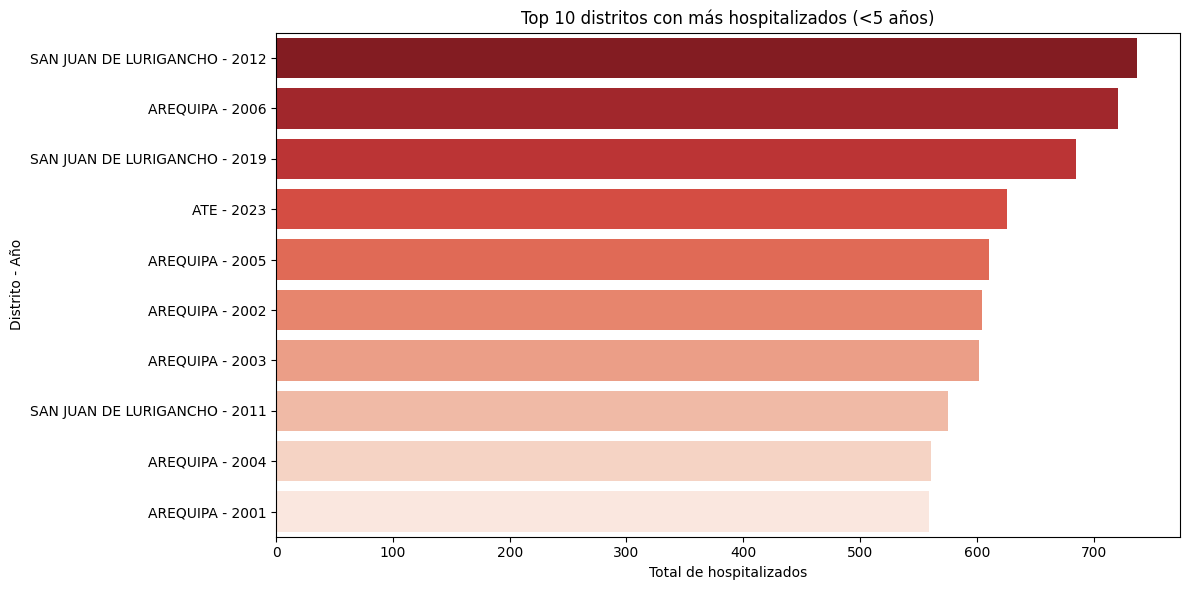

In [74]:
# Agrupar por distrito y año
top_distritos = df_sin_outliers.groupby(['distrito', 'ano'])['hospitalizados_men5'].sum().reset_index()

# Top 10 combinaciones
top10 = top_distritos.sort_values('hospitalizados_men5', ascending=False).head(10)

# Crear etiqueta combinada
top10['distrito_ano'] = top10['distrito'] + " - " + top10['ano'].astype(str)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, y='distrito_ano', x='hospitalizados_men5', palette='Reds_r')
plt.title('Top 10 distritos con más hospitalizados (<5 años)')
plt.xlabel('Total de hospitalizados')
plt.ylabel('Distrito - Año')
plt.tight_layout()
plt.show()


Los valores extremos fueron eliminados, lo que permite visualizar distritos con hospitalizaciones frecuentes y moderadas.

**Observaciones:**

* El rango de hospitalizados está por debajo de los 150 casos, lo que refleja mejor el comportamiento común del dataset (recordar que el 99% de los datos están entre 0 y 3).

* Los años predominantes van desde 2005 a 2009, concentrando los picos moderados.

#### describe()

In [75]:
df_sin_outliers['hospitalizados_men5'].describe()


count    2.137711e+06
mean     1.254711e-01
std      7.045193e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.500000e+01
Name: hospitalizados_men5, dtype: float64

✨ Conclusión general
Hay una enorme concentración de ceros (el 75% o más).

Los valores no nulos (1, 2, 3 hospitalizados) son escasos, pero aún informativos.

Este tipo de distribución altamente sesgada a la izquierda y con baja varianza podría necesitar:

Agrupamiento por semana/mes para observar tendencias más claras.

Modelos que soporten datos zero-inflated si vas a hacer predicción.

Tratamiento especial si aplicas clustering o técnicas sensibles a la varianza.

# 3. Análisis Bivariado con fechas

## Variable principal: hospitalizados_men5

### 3.1 Visualización sin outliers

#### Gráfico de líneas anual

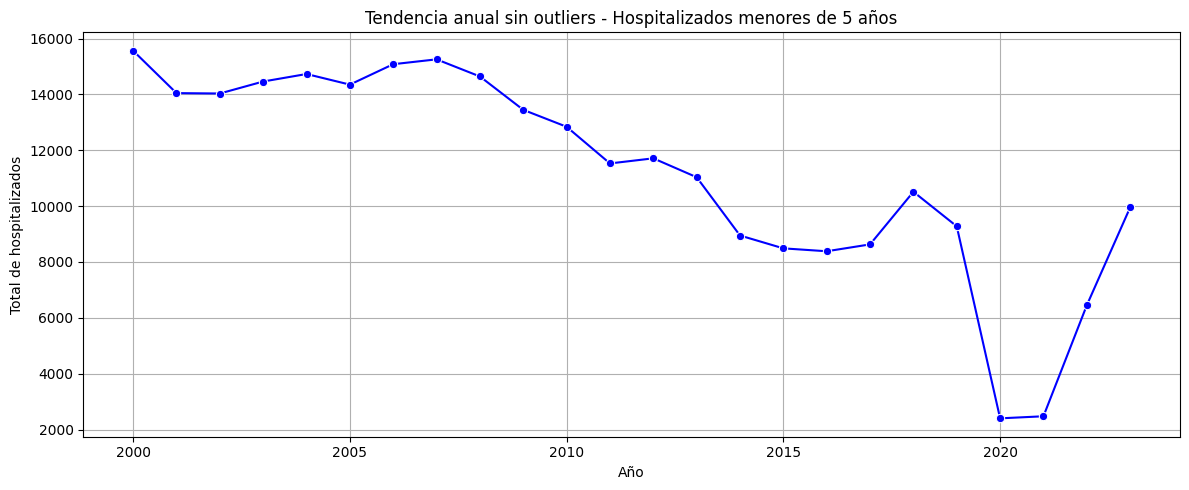

In [76]:
# Agrupamos por año sin outliers
anual_sin_outliers = df_sin_outliers.groupby('ano')['hospitalizados_men5'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=anual_sin_outliers, x='ano', y='hospitalizados_men5', marker='o', color='blue')
plt.title('Tendencia anual sin outliers - Hospitalizados menores de 5 años')
plt.xlabel('Año')
plt.ylabel('Total de hospitalizados')
plt.grid(True)
plt.tight_layout()
plt.show()

Interpretación del gráfico – Análisis temporal sin outliers
Al observar la tendencia anual de hospitalizaciones en menores de 5 años (sin outliers), se identifican tres momentos clave:

* 2000–2008: Se mantiene una cifra alta y relativamente estable, con valores por encima de los 8,000 casos anuales.

* 2009–2019: Se observa una disminución progresiva, donde los hospitalizados caen hasta casi la mitad en una década, lo cual podría relacionarse con mejoras en prevención, atención médica o campañas de vacunación.

* 2020–2021: Hay una caída abrupta en los casos reportados, llegando a su mínimo histórico. Este comportamiento coincide con la pandemia por COVID-19, donde el acceso a servicios médicos no urgentes disminuyó, muchas familias evitaron centros de salud y se implementaron medidas como el confinamiento, lo cual pudo afectar la notificación de casos.

* 2022–2023: Se ve un repunte que sugiere el retorno progresivo a la normalidad y una posible recuperación del sistema de vigilancia.

#### Gráfico de líneas agrupado (Año/Semana)

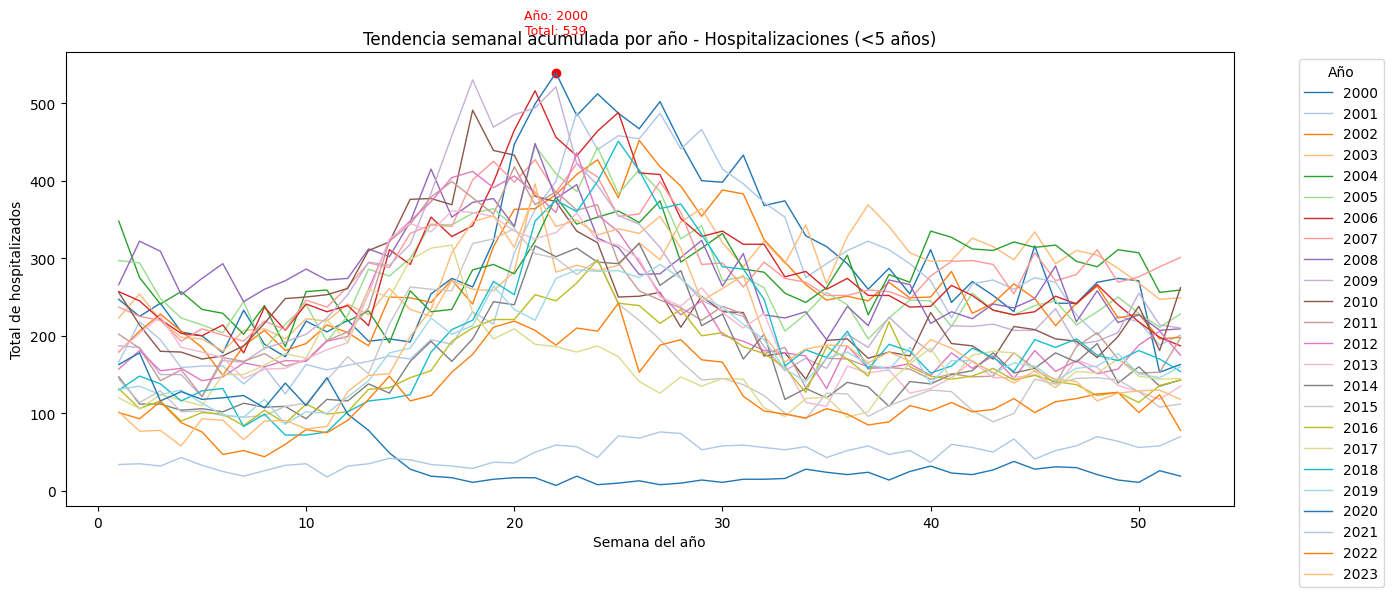

In [77]:
# Agrupar por año y semana
semana_agrupado = df_sin_outliers.groupby(['ano', 'semana'])['hospitalizados_men5'].sum().reset_index()

# Encontrar el valor máximo
max_valor = semana_agrupado['hospitalizados_men5'].max()
pico = semana_agrupado[semana_agrupado['hospitalizados_men5'] == max_valor]

# Graficar
plt.figure(figsize=(14, 6))
sns.lineplot(data=semana_agrupado, x='semana', y='hospitalizados_men5', hue='ano', palette='tab20', linewidth=1)

# Anotar el valor máximo
plt.scatter(pico['semana'], pico['hospitalizados_men5'], color='red')
for _, fila in pico.iterrows():
    plt.text(fila['semana'], fila['hospitalizados_men5'] + 50,
             f"Año: {fila['ano']}\nTotal: {int(fila['hospitalizados_men5'])}",
             ha='center', fontsize=9, color='red')

plt.title('Tendencia semanal acumulada por año - Hospitalizaciones (<5 años)')
plt.xlabel('Semana del año')
plt.ylabel('Total de hospitalizados')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Principales hallazgos:
* Picos claros en semanas específicas

* El mayor pico ocurrió en el año 2000, semana 26, con un total de 292 hospitalizaciones. Esto indica un posible evento epidémico o estacional fuerte en ese año.

* Estacionalidad moderada. Se observa que en la mayoría de los años, los valores tienden a aumentar entre las semanas 20 y 35. Esto sugiere una posible correlación con factores estacionales como el invierno o las enfermedades respiratorias.

* Variabilidad anual: Años como 2000, 2004, 2006, 2008, 2010 y 2012 muestran líneas más elevadas y constantes → podrían representar años de crisis sanitaria o incremento poblacional. En cambio, 2020–2021 se observan con menor volumen, posiblemente por la pandemia de COVID-19 y sus efectos indirectos (menos visitas a hospitales, cambios en el sistema de salud).



#### Gráfico de líneas (Verficar outliers)

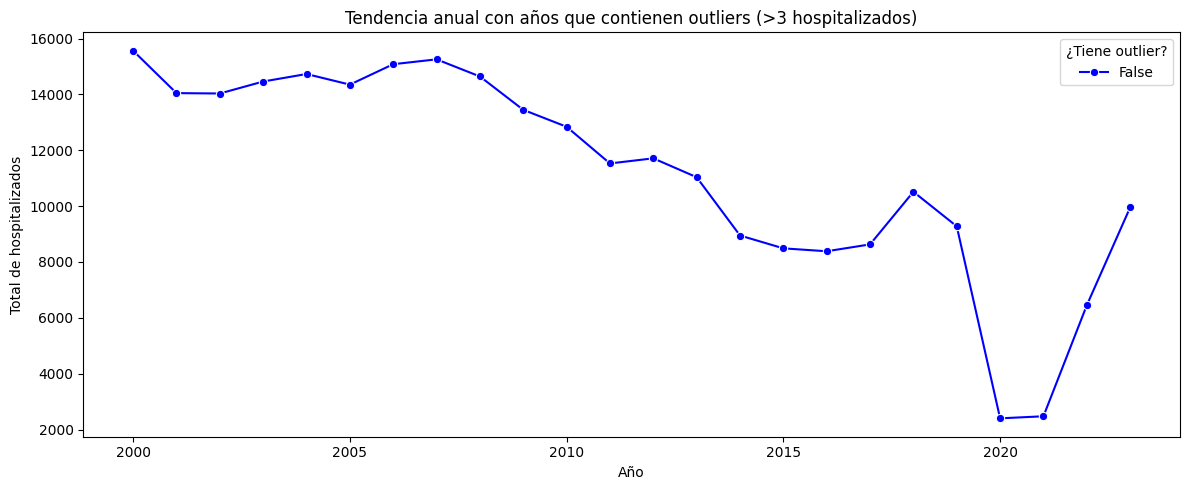

In [78]:
# Marcar si un año tuvo outliers extremos
outliers_anuales = df_sin_outliers[df_sin_outliers['hospitalizados_men5'] > 35]
anos_con_outliers = outliers_anuales['ano'].unique()

# Agregar total anual
anual = df_sin_outliers.groupby('ano')['hospitalizados_men5'].sum().reset_index()
anual['outlier'] = anual['ano'].isin(anos_con_outliers)

# Graficar
plt.figure(figsize=(12, 5))
sns.lineplot(data=anual, x='ano', y='hospitalizados_men5', marker='o', hue='outlier', palette={True: 'red', False: 'blue'})
plt.title('Tendencia anual con años que contienen outliers (>3 hospitalizados)')
plt.ylabel('Total de hospitalizados')
plt.xlabel('Año')
plt.legend(title='¿Tiene outlier?')
plt.tight_layout()
plt.show()

En el gráfico no se muestran años en rojo, ya que todos los puntos son azules, lo que indica que ningún año en este conjunto tuvo registros con hospitalizados >3, debido al filtrado de outliers.

#### Histplot, boxplot por regiones

In [79]:
region_por_departamento = {
    "Amazonas": "Selva",
    "Ancash": "Sierra",
    "Apurimac": "Sierra",
    "Arequipa": "Sierra",
    "Ayacucho": "Sierra",
    "Cajamarca": "Sierra",
    "Callao": "Costa",
    "Cusco": "Sierra",
    "Huancavelica": "Sierra",
    "Huanuco": "Sierra",
    "Ica": "Costa",
    "Junin": "Sierra",
    "La Libertad": "Costa",
    "Lambayeque": "Costa",
    "Lima": "Costa",
    "Loreto": "Selva",
    "Madre De Dios": "Selva",
    "Moquegua": "Costa",
    "Pasco": "Sierra",
    "Piura": "Costa",
    "Puno": "Sierra",
    "San Martin": "Selva",
    "Tacna": "Costa",
    "Tumbes": "Costa",
    "Ucayali": "Selva",
    "Prov. Const. Del Callao": "Costa",
}

In [80]:
df_sin_outliers['departamento'] = df_sin_outliers['departamento'].str.title()

In [81]:
df_sin_outliers['region_natural'] = df_sin_outliers['departamento'].map(region_por_departamento)

In [82]:
print(df_sin_outliers['region_natural'].value_counts(dropna=False))

region_natural
Sierra    1269224
Costa      611929
Selva      256558
Name: count, dtype: int64


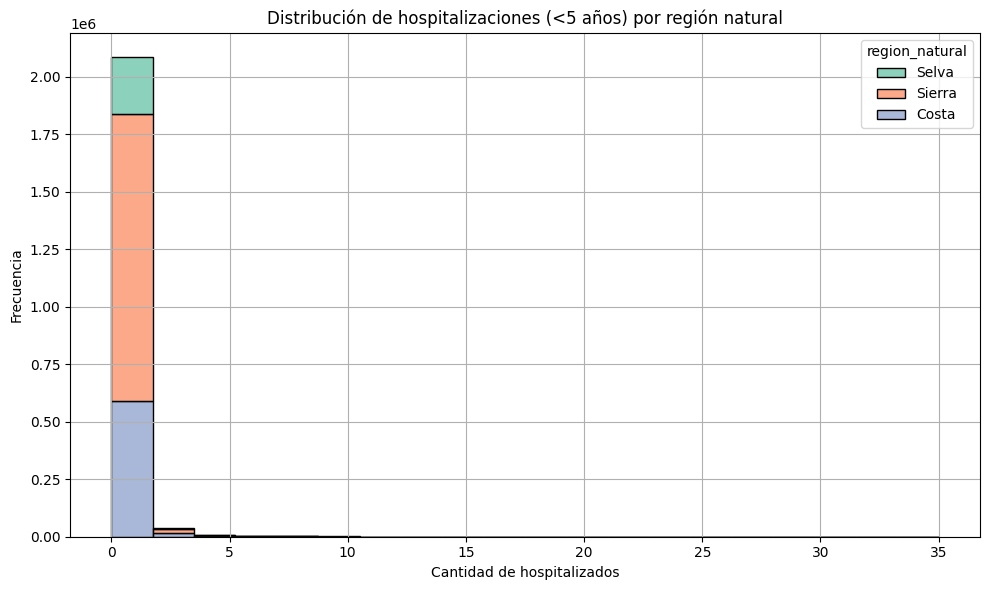

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sin_outliers, x='hospitalizados_men5', hue='region_natural',
             multiple='stack', bins=20, palette='Set2')
plt.title('Distribución de hospitalizaciones (<5 años) por región natural')
plt.xlabel('Cantidad de hospitalizados')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
df_sin_outliers['region_natural'].value_counts()


region_natural
Sierra    1269224
Costa      611929
Selva      256558
Name: count, dtype: int64

* La mayoría de los registros tienen muy pocos hospitalizados (0 o 1), lo que es esperable dada la granularidad del dataset (posiblemente diario o semanal por distrito).

* La Sierra es la región con mayor número de registros, seguida por la Costa y finalmente la Selva, aunque esto no necesariamente implica mayor severidad, sino posiblemente mayor cantidad de centros de reporte.

* Hay algunos picos aislados con valores de 2 o 3 hospitalizados por registro, pero son poco frecuentes.



C:\Users\quine\AppData\Local\Temp\ipykernel_3328\3232405395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sin_outliers, x='region_natural', y='hospitalizados_men5', palette='Set2')


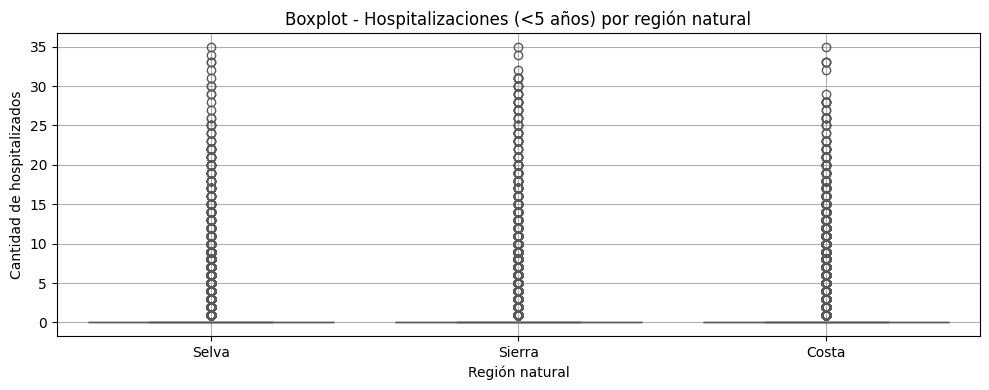

In [85]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_sin_outliers, x='region_natural', y='hospitalizados_men5', palette='Set2')
plt.title('Boxplot - Hospitalizaciones (<5 años) por región natural')
plt.xlabel('Región natural')
plt.ylabel('Cantidad de hospitalizados')
plt.grid(True)
plt.tight_layout()
plt.show()


**Distribución aplastada en 0:**

* La mediana en cada región es 0 o casi 0.

* Esto indica que la mayoría de los registros en cada región son 0 hospitalizados.

**Pocos valores diferentes a 0:**

* Se observan varios outliers por región (círculos individuales): valores de 1, 2 o 3 hospitalizados.

* Esto es consistente con tu análisis previo de que el 99% de los datos están entre 0 y 3.

**Regiones comparables:**

* Las tres regiones tienen patrones de dispersión muy similares.

* No hay una región con una distribución significativamente más alta en hospitalizados, lo que sugiere que la cantidad de hospitalizados por registro es baja en general, sin importar la región.

#### Gráfico de barras por departamentos

C:\Users\quine\AppData\Local\Temp\ipykernel_3328\2130226509.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=deptos, x='hospitalizados_men5', y='departamento', palette='viridis')


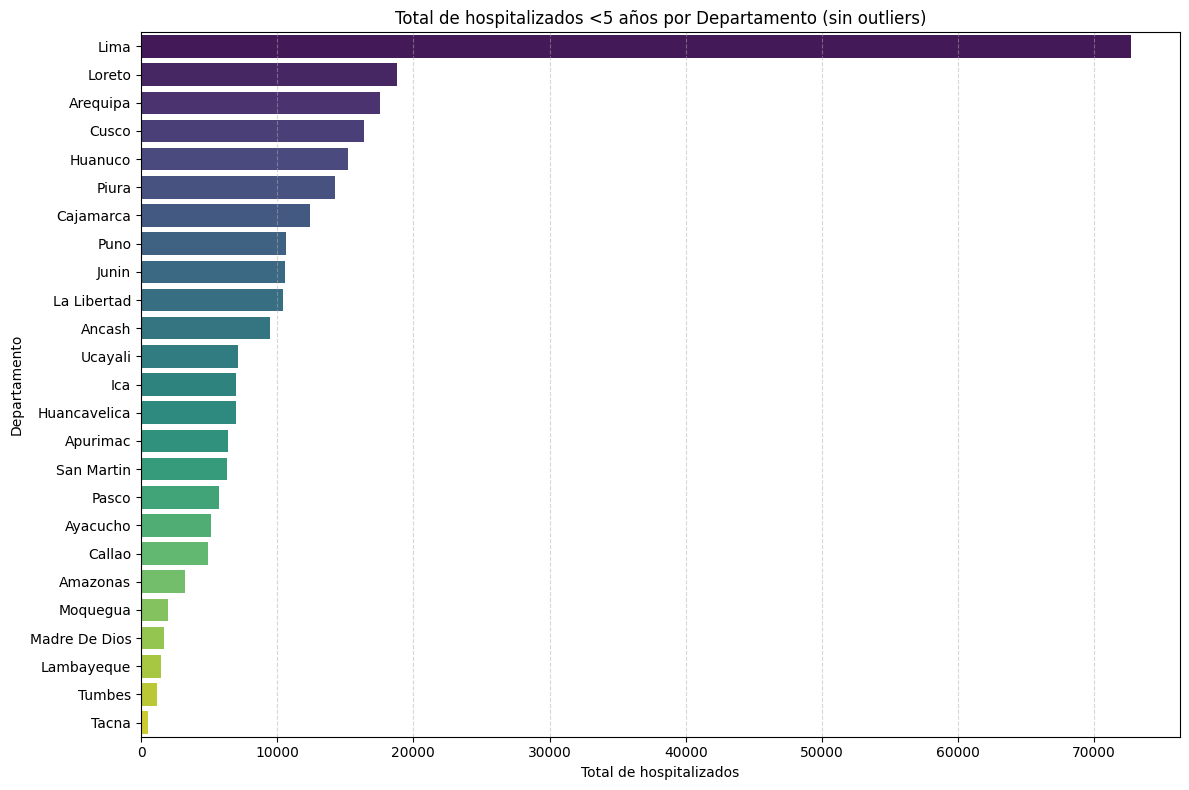

In [86]:
# Agrupar por departamento y sumar hospitalizaciones
deptos = df_sin_outliers.groupby('departamento')['hospitalizados_men5'].sum().reset_index()

# Ordenar de mayor a menor
deptos = deptos.sort_values(by='hospitalizados_men5', ascending=False)

# Gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(data=deptos, x='hospitalizados_men5', y='departamento', palette='viridis')
plt.title('Total de hospitalizados <5 años por Departamento (sin outliers)')
plt.xlabel('Total de hospitalizados')
plt.ylabel('Departamento')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


* Lima lidera ampliamente en hospitalizaciones, con más de 40,000 casos acumulados. Le siguen Cusco, Huánuco y Arequipa, todos por encima de los 10,000.

* Departamentos como Tacna, Tumbes y Madre de Dios tienen los niveles más bajos de hospitalización, por debajo de los 2,000.

* Este gráfico resalta desigualdades geográficas en el acceso o la necesidad de hospitalización, útil para políticas públicas o planificación sanitaria.



#### Heatmap bivariado

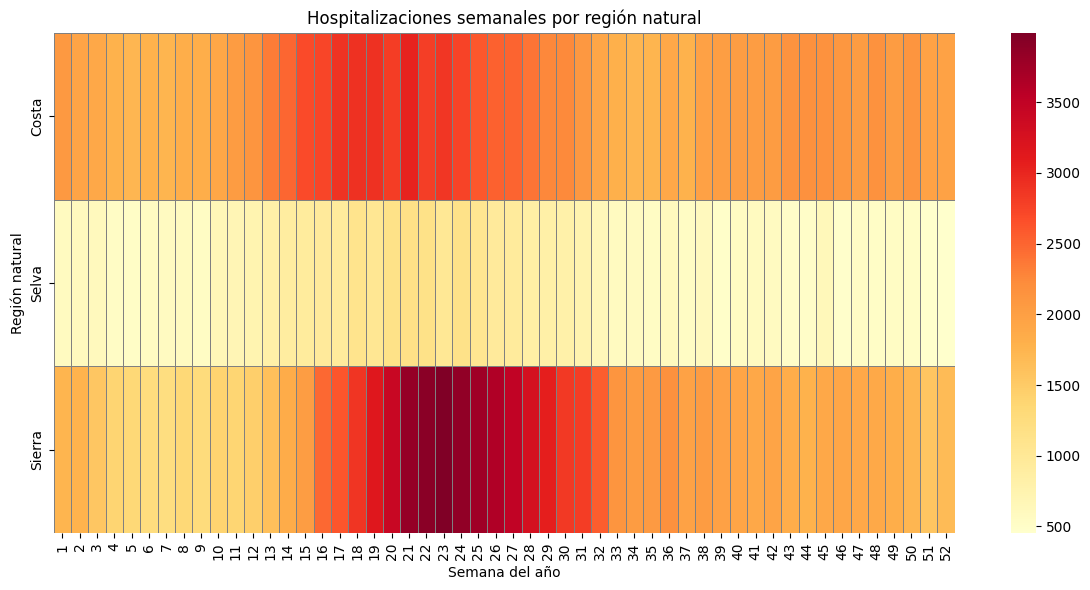

In [87]:
# Agrupar por semana y región
heat_data = df_sin_outliers.groupby(['semana', 'region_natural'])['hospitalizados_men5'].sum().unstack().fillna(0)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heat_data.T, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Hospitalizaciones semanales por región natural')
plt.xlabel('Semana del año')
plt.ylabel('Región natural')
plt.tight_layout()
plt.show()


* Sierra presenta un pico muy claro entre las semanas 20 y 30 (aproximadamente mayo a julio), lo que puede estar relacionado con el invierno andino y aumento de enfermedades respiratorias.

* Costa muestra una distribución bastante constante a lo largo del año, con una ligera elevación en las semanas intermedias.

* Selva mantiene un nivel muy bajo y estable de hospitalizaciones en todo el año, aunque es importante revisar si esto se debe a subregistro o menor población.

# Análisis Multivariado

## Variable principal: hospitalizados_men5

### 4.1 Visualización sin outliers

#### Heatmap multivariado

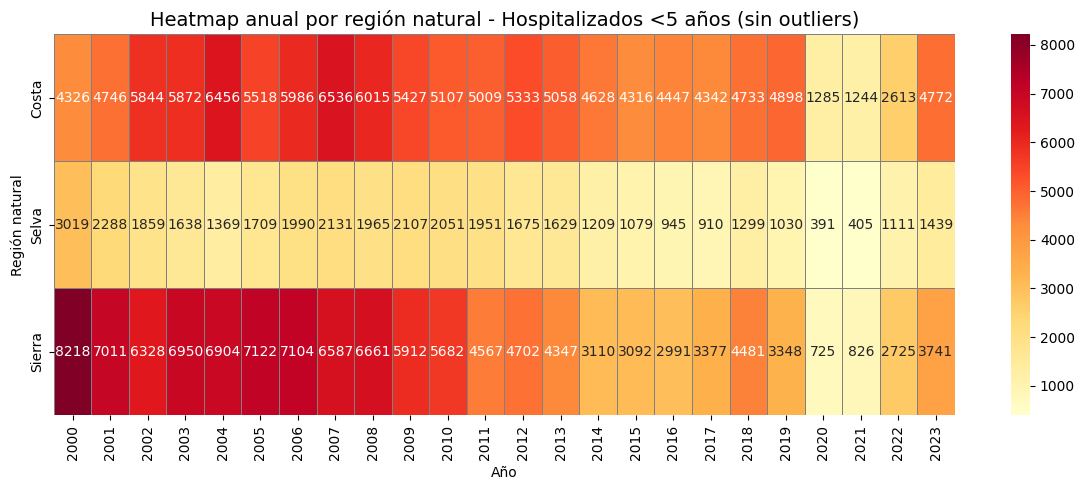

In [88]:
# Agrupar por año y región
heat_anual = df_sin_outliers.groupby(['ano', 'region_natural'])['hospitalizados_men5'].sum().reset_index()

# Pivotear para heatmap
heatmap_data_anual = heat_anual.pivot(index='region_natural', columns='ano', values='hospitalizados_men5')

# Heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data_anual, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5, linecolor='gray')
plt.title('Heatmap anual por región natural - Hospitalizados <5 años (sin outliers)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Región natural')
plt.tight_layout()
plt.show()



Se creó un heatmap para mostrar la evolución anual de hospitalizaciones de menores de 5 años, distribuidas por región natural del Perú (Costa, Sierra y Selva), excluyendo valores atípicos (outliers).

#### Gráfico de burbujas total anual

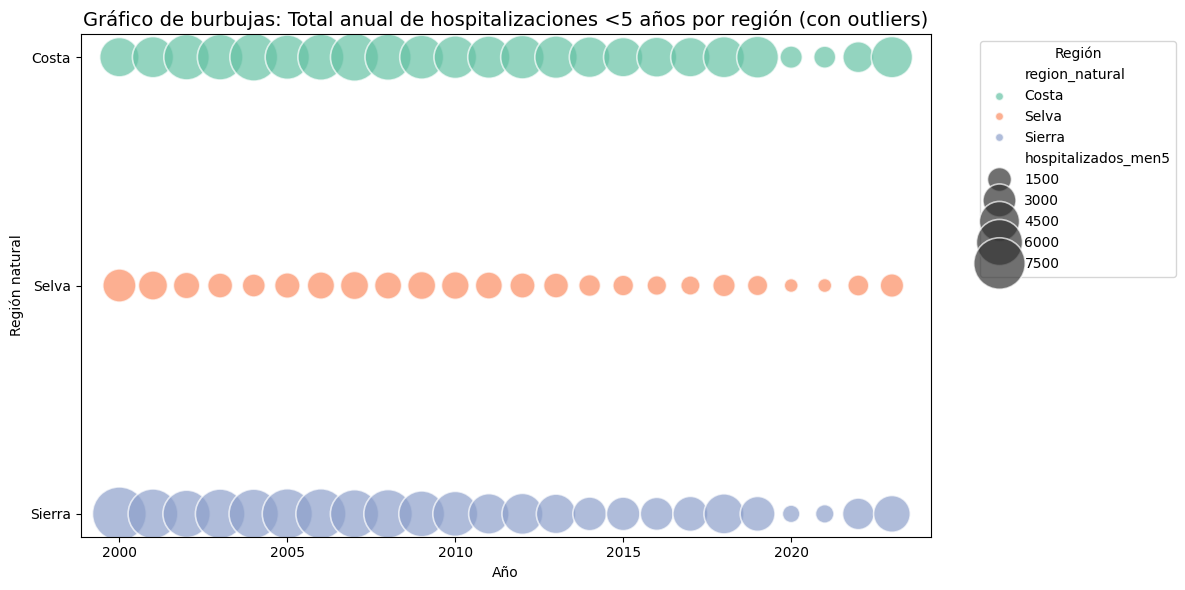

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar datos por año y región natural
burbujas_data = df_sin_outliers.groupby(['ano', 'region_natural'])['hospitalizados_men5'].sum().reset_index()

# Crear el gráfico de burbujas
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=burbujas_data,
    x='ano',
    y='region_natural',
    size='hospitalizados_men5',
    hue='region_natural',
    sizes=(100, 1500),
    alpha=0.7,
    palette='Set2'
)

plt.title('Gráfico de burbujas: Total anual de hospitalizaciones <5 años por región (con outliers)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Región natural')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Este gráfico muestra la evolución anual del número total de hospitalizaciones de menores de 5 años, diferenciadas por región natural: Costa, Sierra y Selva.

* Cada burbuja representa un año específico para una región.

* El tamaño de la burbuja es proporcional al número total de hospitalizaciones en ese año y región.

* El color ayuda a identificar rápidamente la región correspondiente.

#### Gráfico laneal semanal por año y región

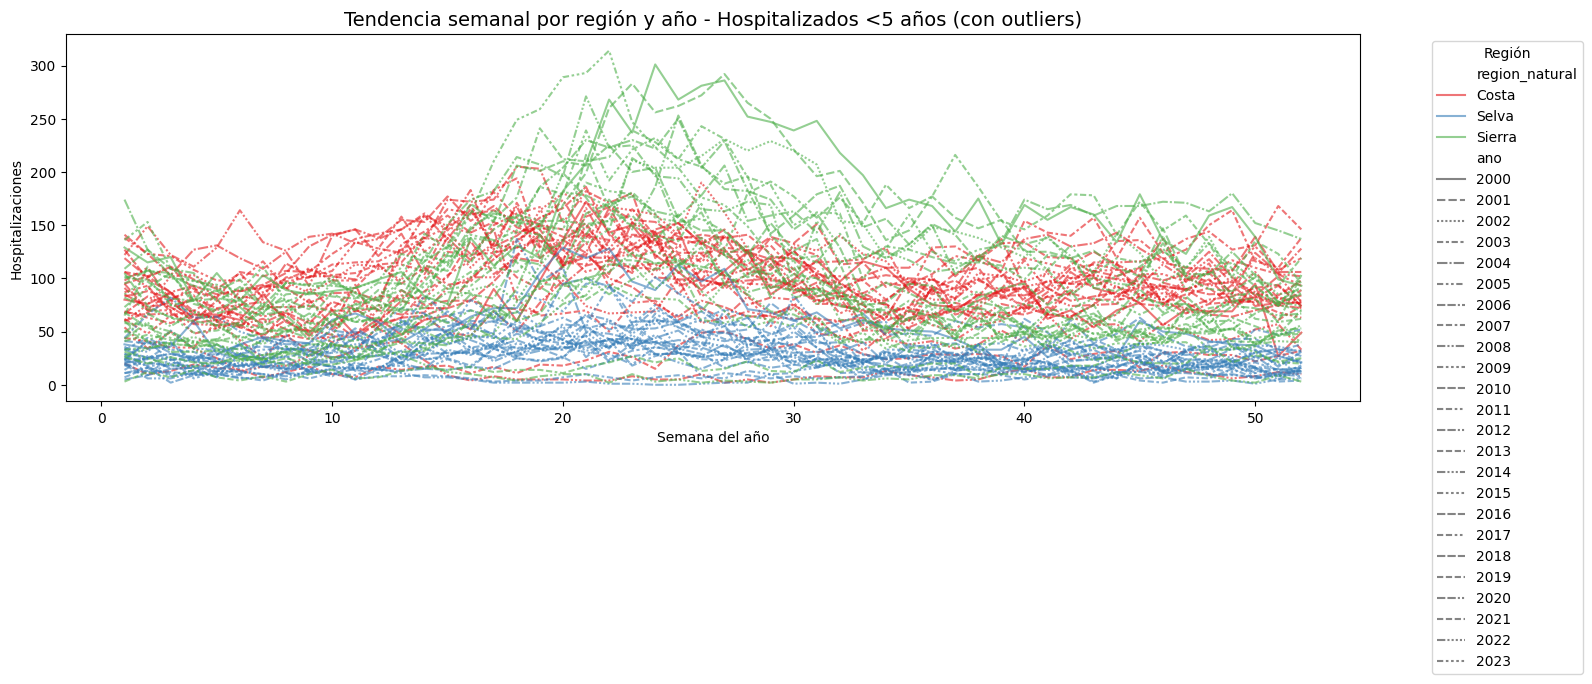

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna combinada año-semana para eje X
df_sin_outliers['anio_semana'] = df_sin_outliers['ano'].astype(str) + '-' + df_sin_outliers['semana'].astype(str)

# Agrupar por año, semana y región natural
combi_data = df_sin_outliers.groupby(['ano', 'semana', 'region_natural'])['hospitalizados_men5'].sum().reset_index()

# Crear gráfico combinado
plt.figure(figsize=(16, 6))
sns.lineplot(
    data=combi_data,
    x='semana',
    y='hospitalizados_men5',
    hue='region_natural',
    style='ano',
    palette='Set1',
    alpha=0.6
)

plt.title('Tendencia semanal por región y año - Hospitalizados <5 años (con outliers)', fontsize=14)
plt.xlabel('Semana del año')
plt.ylabel('Hospitalizaciones')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Picos estacionales claros: La mayoría de los picos de hospitalizaciones se concentran entre las semanas 15 y 30, lo que podría coincidir con temporadas frías o lluviosas donde aumentan las infecciones respiratorias agudas (IRA).

La región Sierra (verde) muestra las mayores concentraciones de hospitalizaciones, especialmente durante los picos estacionales. Esto sugiere una mayor vulnerabilidad climática y/o menor acceso a servicios preventivos.

La región Selva (azul) presenta los valores más bajos, con una tendencia más estable, mientras que la Costa (rojo) tiene un comportamiento intermedio.

2020 y 2021 tienen líneas más bajas o irregulares en comparación con años anteriores, lo cual podría reflejar el impacto de la pandemia: disminución en la asistencia hospitalaria o cambios en los reportes.



#  Conclusión general del análisis exploratorio:  
## *Hospitalizaciones de menores de 5 años en Perú (2000–2023)*

Durante este análisis exploratorio, se investigaron las hospitalizaciones de menores de 5 años asociadas a Infecciones Respiratorias Agudas (IRA) en Perú, desagregadas por región natural, semana, año y distrito. El análisis, realizado tanto con *outliers* como sin ellos, permitió descubrir patrones **temporales**, **geográficos** y **estacionales** significativos.

---

###  1. Tendencias generales y comportamiento por regiones naturales

* **Sierra**: concentra los valores más altos de hospitalizaciones en casi todos los años. Esto podría estar relacionado con factores ambientales (bajas temperaturas, altitud) y desigualdades en acceso a servicios de salud.
* **Costa**: muestra hospitalizaciones en niveles intermedios pero con una marcada estacionalidad.
* **Selva**: mantiene valores bajos a lo largo del tiempo, con una tendencia decreciente sostenida desde inicios del 2000.

---

###  2. Efecto del COVID-19 (2020–2021)

* Se observa una **anomalía significativa**: los niveles de hospitalización **no presentan picos estacionales** como en años anteriores.
* Esto coincide con la pandemia del **COVID-19** y medidas como el confinamiento, uso de mascarillas y cierre de instituciones, lo cual pudo reducir la exposición a otros virus respiratorios.

---

###  3. Outliers y su impacto en el análisis

* Se identificaron valores extremos que afectaban la lectura de los gráficos.
* Al eliminarlos:
  - Se observaron **patrones más realistas**.
  - Se evitó el sesgo causado por errores de digitación o eventos atípicos.

---

###  4. Visualización geoespacial y uso del `ubigeo`

* Se utilizó una base externa con coordenadas para unirla mediante el código `ubigeo`.
* Se generó un **mapa espacial de hospitalizaciones** por distrito.
* Esto permitió:
  - Identificar distritos críticos.
  - Validar que los `ubigeo` tengan **formato de 6 dígitos**.
  - Usar la información espacial para futuras **acciones focalizadas en salud pública**.

---

###  5. Análisis semanal y estacional

* El gráfico de líneas por semana mostró un **patrón estacional constante** entre las semanas 15 y 30 (otoño-invierno).
* Esta tendencia se mantiene entre años, excepto en 2020–2021, reafirmando el impacto del COVID-19.
* La estacionalidad permite prever épocas de mayor carga hospitalaria.

---

##  Recomendaciones clave

* Priorizar vigilancia sanitaria en la **región Sierra**, especialmente en temporadas frías.
* Aprovechar el uso de `ubigeo` y coordenadas para mapear zonas críticas.
* Investigar con mayor profundidad el impacto de la pandemia en otras enfermedades respiratorias.
* Complementar este análisis con variables adicionales como:
  - Condiciones climáticas
  - Niveles de pobreza
  - Acceso a servicios de salud

---

**Este análisis constituye una base sólida para la toma de decisiones en salud pública, orientadas a la prevención y gestión eficiente de recursos sanitarios en el Perú.**



---

In [91]:
df.to_csv("../data/02_limpia/df_cleaned.csv", index=False, encoding="utf-8")


### Obtención de csv con la mayor cantidad de semanas completas

In [92]:
df.head()

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,1,9,10101,6,0,0,0,0,0,0
1,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,1,36,10101,10,0,0,0,0,0,0
2,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,2,9,10101,6,0,0,0,0,0,0
3,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,2,36,10101,7,3,0,0,0,0,0
4,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,2000,3,36,10101,8,2,0,0,0,0,0


In [93]:
df["departamento"].value_counts().get("LIMA", 0)


np.int64(251449)

In [94]:
df = df[df["departamento"] == "LIMA"]

In [95]:
import os

# Crear carpeta dentro de "data"
output_dir = "../data/sub_reg_nt_csvs"
os.makedirs(output_dir, exist_ok=True)

# Obtener los valores únicos de la columna sub_reg_nt
valores = df["sub_reg_nt"].unique()

# Crear un diccionario que guarda un DataFrame por cada valor
dfs_por_subreg = {valor: df[df["sub_reg_nt"] == valor] for valor in valores}

# Guardar cada DataFrame filtrado en un CSV dentro de la carpeta
for valor, df_filtrado in dfs_por_subreg.items():
    filename = os.path.join(output_dir, f"sub_reg_nt_{valor}.csv")
    df_filtrado.to_csv(filename, index=False, encoding="utf-8-sig")
    print(f"✅ Guardado: {filename}")


✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_50.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_52.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_13.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_11.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_10.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_42.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_9.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_7.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_12.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_53.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_2.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_35.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_16.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_8.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_14.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_38.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_22.csv
✅ Guardado: ../data/sub_reg_nt_csvs\sub_reg_nt_51.csv
✅ Guardado: ../data/sub_reg_nt_c

In [96]:
# Resumen: cuántas semanas tiene cada sub_reg_nt por año
resumen = df.groupby(["sub_reg_nt", "ano"])["semana"].nunique().reset_index()

# Renombrar la columna para claridad
resumen = resumen.rename(columns={"semana": "cant_semanas"})

resumen

,sub_reg_nt,ano,cant_semanas
0,2,2000,2
1,2,2001,3
2,2,2008,4
3,2,2009,15
4,2,2010,25
...,...,...,...
372,53,2019,52
373,53,2020,52
374,53,2021,52
375,53,2022,52


Al revisar cada CSV generado, solo los correspondientes a `sub_reg_nt` 7, 42, 50, 52 y 53 de Lima tienen completas sus semanas epidemiológicas.


In [97]:
import os
import pandas as pd

# Carpeta con los CSVs generados
input_dir = "../data/sub_reg_nt_csvs"

# Lista de archivos en la carpeta
files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

# Lista para resultados
resultados = []

for file in files:
    sub_reg_nt = file.split("_")[-1].replace(".csv", "")
    filepath = os.path.join(input_dir, file)

    # Leer CSV
    df_sub = pd.read_csv(filepath)

    # Resumen: cuántas semanas únicas por año
    resumen = df_sub.groupby("ano")["semana"].nunique().reset_index()
    resumen = resumen.rename(columns={"semana": "cant_semanas"})

    # Revisar si todos los años tienen 52 o 53 semanas
    completos = resumen["cant_semanas"].isin([52, 53]).all()

    resultados.append({
        "sub_reg_nt": sub_reg_nt,
        "completo": completos,
        "años_revisados": resumen.shape[0],
        "años_incompletos": resumen[~resumen["cant_semanas"].isin([52, 53])].to_dict("records")
    })

# Mostrar resultados
for r in resultados:
    estado = "✅ Completo" if r["completo"] else "❌ Incompleto"
    if estado == "❌ Incompleto": continue
    print(f"Sub_reg_nt {r['sub_reg_nt']}: {estado} (Años revisados: {r['años_revisados']})")
    if not r["completo"]:
        print("   Años con semanas incompletas:", r["años_incompletos"])


Sub_reg_nt 42: ✅ Completo (Años revisados: 24)
Sub_reg_nt 50: ✅ Completo (Años revisados: 24)
Sub_reg_nt 52: ✅ Completo (Años revisados: 24)
Sub_reg_nt 53: ✅ Completo (Años revisados: 24)


In [98]:
import os
import pandas as pd

# Carpeta con los CSVs generados
input_dir = "../data/sub_reg_nt_csvs"

# Lista de archivos en la carpeta
files = [f for f in os.listdir(input_dir) if f.endswith(".csv")]

# Lista para resultados
resultados = []

for file in files:
    sub_reg_nt = file.split("_")[-1].replace(".csv", "")
    filepath = os.path.join(input_dir, file)

    # Leer CSV
    df_sub = pd.read_csv(filepath)

    # Resumen: cuántas semanas únicas por año y distrito
    resumen = (
        df_sub.groupby(["distrito", "ano"])["semana"]
        .nunique()
        .reset_index()
        .rename(columns={"semana": "cant_semanas"})
    )

    # Revisar si cada año es completo
    resumen["completo"] = resumen["cant_semanas"].isin([52, 53])

    # Consolidar resultados por distrito
    for distrito, df_distrito in resumen.groupby("distrito"):
        df_distrito = df_distrito.sort_values("ano").reset_index(drop=True)

        # Calcular consecutividad: contar semanas completas hasta que aparezca un año incompleto
        semanas_consecutivas = 0
        start_year = None
        end_year = None

        for _, row in df_distrito.iterrows():
            if row["completo"]:
                if start_year is None:
                    start_year = row["ano"]  # primer año completo
                semanas_consecutivas += row["cant_semanas"]
                end_year = row["ano"]  # último año consecutivo completo
            else:
                break  # se corta la racha consecutiva

        resultados.append({
            "sub_reg_nt": sub_reg_nt,
            "distrito": distrito,
            "completo": df_distrito["completo"].all(),
            "años_revisados": df_distrito.shape[0],
            "años_incompletos": df_distrito[~df_distrito["completo"]].to_dict("records"),
            "semanas_consecutivas": semanas_consecutivas,
            "desde_hasta": (start_year, end_year) if start_year else None
        })

# 🔹 Ordenar resultados por semanas consecutivas (descendente)
resultados_ordenados = sorted(resultados, key=lambda x: x["semanas_consecutivas"], reverse=True)

# Mostrar resultados ordenados
for r in resultados_ordenados:
    estado = "✅ Completo" if r["completo"] else "❌ Incompleto"
    if estado == "❌ Incompleto":
        continue

    if r["desde_hasta"]:
        rango = f"{r['desde_hasta'][0]} → {r['desde_hasta'][1]}"
    else:
        rango = "N/A"

    print(f"Sub_reg_nt {r['sub_reg_nt']} - Distrito {r['distrito']}: {estado} "
          f"(Años revisados: {r['años_revisados']}, "
          f"Semanas consecutivas: {r['semanas_consecutivas']}, "
          f"Rango: {rango})")

    if not r["completo"]:
        print("   Años con semanas incompletas:", r["años_incompletos"])


Sub_reg_nt 50 - Distrito CHORRILLOS: ✅ Completo (Años revisados: 24, Semanas consecutivas: 1248, Rango: 2000 → 2023)
Sub_reg_nt 50 - Distrito COMAS: ✅ Completo (Años revisados: 24, Semanas consecutivas: 1248, Rango: 2000 → 2023)
Sub_reg_nt 50 - Distrito LA VICTORIA: ✅ Completo (Años revisados: 24, Semanas consecutivas: 1248, Rango: 2000 → 2023)
Sub_reg_nt 50 - Distrito LIMA: ✅ Completo (Años revisados: 24, Semanas consecutivas: 1248, Rango: 2000 → 2023)
Sub_reg_nt 50 - Distrito SAN BORJA: ✅ Completo (Años revisados: 24, Semanas consecutivas: 1248, Rango: 2000 → 2023)
Sub_reg_nt 50 - Distrito SAN MARTIN DE PORRES: ✅ Completo (Años revisados: 24, Semanas consecutivas: 1248, Rango: 2000 → 2023)
Sub_reg_nt 50 - Distrito SANTIAGO DE SURCO: ✅ Completo (Años revisados: 24, Semanas consecutivas: 1248, Rango: 2000 → 2023)
Sub_reg_nt 50 - Distrito SURQUILLO: ✅ Completo (Años revisados: 24, Semanas consecutivas: 1248, Rango: 2000 → 2023)
Sub_reg_nt 52 - Distrito ATE: ✅ Completo (Años revisados: 2